In [1]:
import importlib
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import seaborn as sns
from atmacup_18 import constants

import utils

importlib.reload(utils)

<module 'utils' from '/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_05_00/utils.py'>

In [2]:
RANDOM_STATE = 2024
utils.seed_everything(RANDOM_STATE)

## データ読み込み

In [3]:
notebook_dir = Path().resolve()
DATA_DIR = notebook_dir.parents[3].joinpath("data")
DATASET_DIR = DATA_DIR.joinpath("atmaCup#18_dataset")
TR_FEATURES_CSV = DATASET_DIR.joinpath("train_features.csv")
TS_FEATURES_CSV = DATASET_DIR.joinpath("test_features.csv")
IMAGES_DIR = DATASET_DIR.joinpath("images")
TRAFFIC_LIGHTS_CSV = DATASET_DIR.joinpath("traffic_lights.csv")

IMAGE_NAMES = ["image_t.png", "image_t-0.5.png", "image_t-1.0.png"]
TRAFFIC_LIGHTS_BBOX_IMAGE_NAME = constants.TRAFFIC_LIGHT_BBOX_IMAGE_NAME

In [4]:
tr_df = utils.read_feature_csv(TR_FEATURES_CSV)
tr_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…","""320"""
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…","""420"""


In [5]:
ts_df = utils.read_feature_csv(TS_FEATURES_CSV)
ts_df.head(2)

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,scene_id,scene_dsec
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,str,str
"""012baccc145d400c896cb82065a93d…",3.374273,-0.01936,-34.008415,17.0,0.0,false,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…","""120"""
"""012baccc145d400c896cb82065a93d…",2.441048,-0.022754,307.860077,295.0,0.0,true,0.0,false,"""drive""",false,false,"""012baccc145d400c896cb82065a93d…","""220"""


In [6]:
tr_tl_bbox_images = utils.load_npy_images(
    IMAGES_DIR,
    ids=tr_df.get_column("ID").to_list(),
    image_names=[TRAFFIC_LIGHTS_BBOX_IMAGE_NAME],
)
print(tr_tl_bbox_images.shape)
ts_tl_bbox_images = utils.load_npy_images(
    IMAGES_DIR,
    ids=ts_df.get_column("ID").to_list(),
    image_names=[TRAFFIC_LIGHTS_BBOX_IMAGE_NAME],
)
print(ts_tl_bbox_images.shape)

(43371, 1, 64, 128, 8)
(1727, 1, 64, 128, 8)


In [7]:
tr_images = utils.load_images(
    IMAGES_DIR, ids=tr_df.get_column("ID").to_list(), image_names=IMAGE_NAMES
)
print(tr_images.shape)
ts_images = utils.load_images(
    IMAGES_DIR, ids=ts_df.get_column("ID").to_list(), image_names=IMAGE_NAMES
)
print(ts_images.shape)

(43371, 3, 64, 128, 3)
(1727, 3, 64, 128, 3)


In [8]:
tr_images = utils.preprocess_images([tr_images, tr_tl_bbox_images])
ts_images = utils.preprocess_images([ts_images, ts_tl_bbox_images])

print(tr_images.shape)
print(ts_images.shape)

(43371, 17, 64, 128)
(1727, 17, 64, 128)


## Target

In [9]:
target = utils.CoordinateTarget(prefix="tg_")
target.fit(tr_df)

tg_df = target.transform(tr_df)
print(tg_df.columns)
print(tg_df.describe().glimpse())
tr_df = pl.concat([tr_df, tg_df], how="horizontal")

['tg_cood_x_0', 'tg_cood_y_0', 'tg_cood_z_0', 'tg_cood_x_1', 'tg_cood_y_1', 'tg_cood_z_1', 'tg_cood_x_2', 'tg_cood_y_2', 'tg_cood_z_2', 'tg_cood_x_3', 'tg_cood_y_3', 'tg_cood_z_3', 'tg_cood_x_4', 'tg_cood_y_4', 'tg_cood_z_4', 'tg_cood_x_5', 'tg_cood_y_5', 'tg_cood_z_5']
Rows: 9
Columns: 19
$ statistic   <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ tg_cood_x_0 <f64> 43371.0, 0.0, 4.122443942757371, 3.2667167639213908, -1.7321542071537557, 1.116530690565041, 3.843337458989432, 6.4281197924248215, 12.392587231992154
$ tg_cood_y_0 <f64> 43371.0, 0.0, 0.0019486856369589753, 0.11686590022408185, -2.5341378248203235, -0.02646308932096216, 0.0010884804706597444, 0.030664179622664968, 3.4595563267615925
$ tg_cood_z_0 <f64> 43371.0, 0.0, 0.001247332026343412, 0.040745039147660006, -0.9965478318668152, -0.017624552286421614, 0.0011112325970167394, 0.01959056385186172, 1.4479292511292303
$ tg_cood_x_1 <f64> 43371.0, 0.0, 8.694386412319787, 6.894354638218222, -3.1

## 特徴量

In [10]:
feature = utils.Feature(prefix="ft_")
feature.fit(tr_df)

ft_df = feature.transform(tr_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
tr_df = pl.concat([tr_df, ft_df], how="horizontal")

ft_df = feature.transform(ts_df)
print(ft_df.columns)
print(ft_df.describe().glimpse())
ts_df = pl.concat([ts_df, ft_df], how="horizontal")

['ft_vEgo', 'ft_aEgo', 'ft_steeringAngleDeg', 'ft_steeringTorque', 'ft_brake', 'ft_brakePressed', 'ft_gas', 'ft_gasPressed', 'ft_is_gearShifter_drive', 'ft_is_gearShifter_neutral', 'ft_is_gearShifter_park', 'ft_is_gearShifter_reverse', 'ft_leftBlinker', 'ft_rightBlinker']
Rows: 9
Columns: 15
$ statistic                 <str> 'count', 'null_count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'
$ ft_vEgo                   <f64> 43371.0, 0.0, 9.172175823216334, 7.226919878374694, -0.1619189828634262, 2.5786657333374023, 8.518790245056152, 14.286815643310547, 27.55126190185547
$ ft_aEgo                   <f64> 43371.0, 0.0, -0.015654028629347255, 0.6324016778486632, -4.936206340789795, -0.2363678514957428, -1.8347540436410405e-15, 0.22229795157909396, 3.1400704383850098
$ ft_steeringAngleDeg       <f64> 43371.0, 0.0, -2.065172574071012, 65.54882159006848, -481.394287109375, -3.461754322052002, -0.35647091269493103, 2.6269068717956543, 484.69171142578125
$ ft_steeringTorque         <f64>

## モデリング

In [11]:
N_SPLITS = 2

In [12]:
model_params = {
    "dnn": {
        "n_img_channels": tr_images.shape[1],
        "n_features": len(feature.columns),
        "n_targets": len(target.columns),
        "segmentation_model_params": {
            "encoder_name": "resnet18",
            "encoder_weights": "imagenet",
            "decoder_channels": (256, 128, 64, 32, 16),
        },
        "dropout": 0.0,
        "embed_dim": 128,
        "n_layers": 1,
    },
    "dev": "cuda",
}

lr = 1e-4
fit_params = {
    "dnn": {
        "tr_batch_size": 32,
        "vl_batch_size": 32,
        "trainer_params": {
            "criterion_params": {},
            "opt": "adamw",
            "opt_params": {"lr": lr, "weight_decay": 1e-4},
            "backbone_opt_params": {"lr": lr, "weight_decay": 1e-4},
            "sch_params": {
                "max_lr": lr,
                "pct_start": 0.1,
                "div_factor": 25,
                "final_div_factor": 1000,
            },
            "epochs": 40,
            "dev": "cuda",
            "prefix": "",
            "save_best": False,
            "save_epochs": [],
            "maximize_score": False,
            "grad_max_norm": None,
        },
    },
}

In [13]:
models, oof_preds = utils.train(
    model_params=model_params,
    fit_params=fit_params,
    df=tr_df,
    images=tr_images,
    target_cols=target.columns,
    feature_cols=feature.columns,
    group_col="scene_id",
    n_splits=N_SPLITS,
)

-----------------
-----------------
Training fold 0...
train samples: 21685, valid samples: 21686
Save model : model.pth

epoch  0
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06
lr  4.000000000000002e-06


100%|██████████| 678/678 [00:08<00:00, 78.32it/s]



Train Loss: 39.2107
{'loss': 39.21066155144876, 'loss_mse_0': 1.6638719654769982, 'loss_mse_1': 0.12847830292987505, 'loss_mse_2': 0.05264760058186123, 'loss_mse_3': 3.672531296090502, 'loss_mse_4': 0.27396964500802656, 'loss_mse_5': 0.10851711452700627, 'loss_mse_6': 4.381253455290942, 'loss_mse_7': 0.5175382663857637, 'loss_mse_8': 0.1594574441046535, 'loss_mse_9': 5.443401236213645, 'loss_mse_10': 0.807879716642146, 'loss_mse_11': 0.21726947945805386, 'loss_mse_12': 8.144845998445676, 'loss_mse_13': 1.2803987195960176, 'loss_mse_14': 0.2986272357987512, 'loss_mse_15': 9.735405363571697, 'loss_mse_16': 1.9856010314456822, 'loss_mse_17': 0.33896754802021706}
Valid Loss: 17.4946
{'loss': 17.494596892050232, 'loss_mse_0': 0.6301038817538273, 'loss_mse_1': 0.10714217332524184, 'loss_mse_2': 0.05008312792223288, 'loss_mse_3': 1.2986274580512427, 'loss_mse_4': 0.2320838029438679, 'loss_mse_5': 0.10276751738085596, 'loss_mse_6': 1.7364412841543686, 'loss_mse_7': 0.4092893129472887, 'loss_m

100%|██████████| 678/678 [00:10<00:00, 67.30it/s]



Train Loss: 10.4297
{'loss': 10.429659079589731, 'loss_mse_0': 0.31328183633207923, 'loss_mse_1': 0.07909546615597152, 'loss_mse_2': 0.04834567303005798, 'loss_mse_3': 0.659050786468796, 'loss_mse_4': 0.18589264911047818, 'loss_mse_5': 0.10040150709901462, 'loss_mse_6': 0.9031154562222553, 'loss_mse_7': 0.3308410877183058, 'loss_mse_8': 0.1464759437436103, 'loss_mse_9': 1.179375304187066, 'loss_mse_10': 0.5094128502986808, 'loss_mse_11': 0.19633378531987417, 'loss_mse_12': 1.5202026926256178, 'loss_mse_13': 0.7744512030609954, 'loss_mse_14': 0.25876882382870775, 'loss_mse_15': 1.8206700450208373, 'loss_mse_16': 1.1019568043146035, 'loss_mse_17': 0.3019871569542624}
Valid Loss: 5.4954
{'loss': 5.495426455430225, 'loss_mse_0': 0.09997069897476286, 'loss_mse_1': 0.07117905607034938, 'loss_mse_2': 0.04244001050943998, 'loss_mse_3': 0.21030083381650547, 'loss_mse_4': 0.14540557355337, 'loss_mse_5': 0.08631186622983411, 'loss_mse_6': 0.315966956745998, 'loss_mse_7': 0.25343334897363606, 'lo

100%|██████████| 678/678 [00:08<00:00, 83.80it/s]



Train Loss: 4.7105
{'loss': 4.710502968404986, 'loss_mse_0': 0.08043152370120081, 'loss_mse_1': 0.05986966664161385, 'loss_mse_2': 0.043347788310198435, 'loss_mse_3': 0.1672123557223527, 'loss_mse_4': 0.12682850501517953, 'loss_mse_5': 0.08785428452901158, 'loss_mse_6': 0.2427422194418386, 'loss_mse_7': 0.22321844795385878, 'loss_mse_8': 0.13063573452645424, 'loss_mse_9': 0.3093369480227966, 'loss_mse_10': 0.3453232834949275, 'loss_mse_11': 0.17601818889599607, 'loss_mse_12': 0.42599096861248353, 'loss_mse_13': 0.5248567877857336, 'loss_mse_14': 0.22416698154023515, 'loss_mse_15': 0.5152765417820946, 'loss_mse_16': 0.7543707860075213, 'loss_mse_17': 0.27302195865831486}
Valid Loss: 3.7185
{'loss': 3.7185107372855013, 'loss_mse_0': 0.05332030235050702, 'loss_mse_1': 0.06035279656676603, 'loss_mse_2': 0.039232233873703094, 'loss_mse_3': 0.10140495143753853, 'loss_mse_4': 0.11077537612610422, 'loss_mse_5': 0.08008165592822221, 'loss_mse_6': 0.16500202639462497, 'loss_mse_7': 0.1825661510

100%|██████████| 678/678 [00:07<00:00, 85.58it/s]



Train Loss: 3.3922
{'loss': 3.392190633003257, 'loss_mse_0': 0.0415610035171559, 'loss_mse_1': 0.05061817601834874, 'loss_mse_2': 0.04182531406891091, 'loss_mse_3': 0.08362194482495725, 'loss_mse_4': 0.09664709125390962, 'loss_mse_5': 0.08443386674730693, 'loss_mse_6': 0.12815726630147575, 'loss_mse_7': 0.16451012894258102, 'loss_mse_8': 0.12723467587060028, 'loss_mse_9': 0.16972714913472467, 'loss_mse_10': 0.2585112227338808, 'loss_mse_11': 0.17158409701646518, 'loss_mse_12': 0.23026196491330905, 'loss_mse_13': 0.3912941272008718, 'loss_mse_14': 0.21806571502761263, 'loss_mse_15': 0.2931590353962766, 'loss_mse_16': 0.5750308004558703, 'loss_mse_17': 0.2659470551651373}
Valid Loss: 2.9658
{'loss': 2.9658082844936744, 'loss_mse_0': 0.027272564341838865, 'loss_mse_1': 0.05464887487424598, 'loss_mse_2': 0.03873377383389898, 'loss_mse_3': 0.05492067098161508, 'loss_mse_4': 0.09564449498155168, 'loss_mse_5': 0.07859829974231643, 'loss_mse_6': 0.08503111315462573, 'loss_mse_7': 0.1533146851

100%|██████████| 678/678 [00:08<00:00, 84.38it/s]



Train Loss: 2.8477
{'loss': 2.847665957016994, 'loss_mse_0': 0.028914790328157355, 'loss_mse_1': 0.043653623297937115, 'loss_mse_2': 0.04137476421122273, 'loss_mse_3': 0.059201755377971614, 'loss_mse_4': 0.0788725632500107, 'loss_mse_5': 0.0835660059098567, 'loss_mse_6': 0.09037055357179138, 'loss_mse_7': 0.13281919772529002, 'loss_mse_8': 0.12626648599906456, 'loss_mse_9': 0.12254154483238827, 'loss_mse_10': 0.21065243330551656, 'loss_mse_11': 0.16963023319565299, 'loss_mse_12': 0.16854594663842037, 'loss_mse_13': 0.32024763286267816, 'loss_mse_14': 0.2154382422533398, 'loss_mse_15': 0.2201876560201321, 'loss_mse_16': 0.47348686841425197, 'loss_mse_17': 0.2618956626771208}
Valid Loss: 2.6603
{'loss': 2.6603189722626612, 'loss_mse_0': 0.017433160457177677, 'loss_mse_1': 0.05070706780939459, 'loss_mse_2': 0.03849529761238612, 'loss_mse_3': 0.03497335819079703, 'loss_mse_4': 0.0898227516477955, 'loss_mse_5': 0.07916269092449704, 'loss_mse_6': 0.05272961371086516, 'loss_mse_7': 0.1406385

100%|██████████| 678/678 [00:08<00:00, 84.37it/s]



Train Loss: 2.4657
{'loss': 2.4657404415716626, 'loss_mse_0': 0.021817834470751234, 'loss_mse_1': 0.04023956623962878, 'loss_mse_2': 0.041103999075401396, 'loss_mse_3': 0.04316029118090604, 'loss_mse_4': 0.06877292458936463, 'loss_mse_5': 0.08282336174198145, 'loss_mse_6': 0.06579656658372243, 'loss_mse_7': 0.11221665150982546, 'loss_mse_8': 0.1250961528488461, 'loss_mse_9': 0.09087849732493897, 'loss_mse_10': 0.17558490130857757, 'loss_mse_11': 0.16763714154524675, 'loss_mse_12': 0.12621023950264673, 'loss_mse_13': 0.26700793391580596, 'loss_mse_14': 0.21213565572568022, 'loss_mse_15': 0.1724098515277247, 'loss_mse_16': 0.3956772040526219, 'loss_mse_17': 0.25717166733090246}
Valid Loss: 2.3892
{'loss': 2.3892450338795475, 'loss_mse_0': 0.015113316334517546, 'loss_mse_1': 0.04758678667506912, 'loss_mse_2': 0.03844317914588393, 'loss_mse_3': 0.029903444280205048, 'loss_mse_4': 0.07200349625859377, 'loss_mse_5': 0.07927546079152409, 'loss_mse_6': 0.04688093623910154, 'loss_mse_7': 0.116

100%|██████████| 678/678 [00:08<00:00, 82.25it/s]



Train Loss: 2.1478
{'loss': 2.1477736542813006, 'loss_mse_0': 0.016686614447010563, 'loss_mse_1': 0.03644790583698731, 'loss_mse_2': 0.04089020346697183, 'loss_mse_3': 0.03269519173351709, 'loss_mse_4': 0.05794764143253843, 'loss_mse_5': 0.08204853289555676, 'loss_mse_6': 0.05030145636172291, 'loss_mse_7': 0.08912522838543138, 'loss_mse_8': 0.12310719420442817, 'loss_mse_9': 0.07149187092458832, 'loss_mse_10': 0.13807024012981436, 'loss_mse_11': 0.16457886521758144, 'loss_mse_12': 0.10159257962540387, 'loss_mse_13': 0.2160987443066418, 'loss_mse_14': 0.20767220307246093, 'loss_mse_15': 0.14304854953592777, 'loss_mse_16': 0.32454473120841354, 'loss_mse_17': 0.2514259017992935}
Valid Loss: 2.2850
{'loss': 2.285034459600758, 'loss_mse_0': 0.015030247588218863, 'loss_mse_1': 0.04545213667068707, 'loss_mse_2': 0.03840450400481094, 'loss_mse_3': 0.030241490791930892, 'loss_mse_4': 0.06867138452204301, 'loss_mse_5': 0.07761041146420096, 'loss_mse_6': 0.04832440360921784, 'loss_mse_7': 0.1042

100%|██████████| 678/678 [00:07<00:00, 85.11it/s]



Train Loss: 1.9833
{'loss': 1.983307671511719, 'loss_mse_0': 0.014952933498998029, 'loss_mse_1': 0.03450737786692522, 'loss_mse_2': 0.04057610046360614, 'loss_mse_3': 0.029924032717882663, 'loss_mse_4': 0.05278330724796437, 'loss_mse_5': 0.08104801661936095, 'loss_mse_6': 0.04565362223840843, 'loss_mse_7': 0.07858481820799311, 'loss_mse_8': 0.12103105502057286, 'loss_mse_9': 0.06610873239899008, 'loss_mse_10': 0.1190288578087197, 'loss_mse_11': 0.16142635628515015, 'loss_mse_12': 0.09384083917895483, 'loss_mse_13': 0.1830269047492452, 'loss_mse_14': 0.2026467304649258, 'loss_mse_15': 0.13716393115997666, 'loss_mse_16': 0.27686114459569555, 'loss_mse_17': 0.24414291766580837}
Valid Loss: 2.2306
{'loss': 2.2305901787274003, 'loss_mse_0': 0.012926037919193858, 'loss_mse_1': 0.04512515910633271, 'loss_mse_2': 0.03824861859147242, 'loss_mse_3': 0.025895129008064798, 'loss_mse_4': 0.07122358986228748, 'loss_mse_5': 0.07741315063682541, 'loss_mse_6': 0.04179551545667921, 'loss_mse_7': 0.1103

100%|██████████| 678/678 [00:07<00:00, 84.88it/s]



Train Loss: 1.8601
{'loss': 1.8601064884504153, 'loss_mse_0': 0.013744442338162436, 'loss_mse_1': 0.03379925154562231, 'loss_mse_2': 0.04002760846630025, 'loss_mse_3': 0.027427775549401078, 'loss_mse_4': 0.05037925542473925, 'loss_mse_5': 0.0794657573951312, 'loss_mse_6': 0.041753852616120656, 'loss_mse_7': 0.07270282111165047, 'loss_mse_8': 0.1174468258327008, 'loss_mse_9': 0.06005210178784553, 'loss_mse_10': 0.10850995202635469, 'loss_mse_11': 0.1557851386926463, 'loss_mse_12': 0.08710812024243914, 'loss_mse_13': 0.16666937426029754, 'loss_mse_14': 0.19440461109712873, 'loss_mse_15': 0.12595598519046514, 'loss_mse_16': 0.2513286934249334, 'loss_mse_17': 0.23354491083009205}
Valid Loss: 2.3299
{'loss': 2.32993281467826, 'loss_mse_0': 0.01583153763263978, 'loss_mse_1': 0.04446925747292089, 'loss_mse_2': 0.03831176023523716, 'loss_mse_3': 0.04319727357619808, 'loss_mse_4': 0.06896011461023033, 'loss_mse_5': 0.07801621813865538, 'loss_mse_6': 0.0721090334552755, 'loss_mse_7': 0.10295646

100%|██████████| 678/678 [00:08<00:00, 82.18it/s]



Train Loss: 1.6965
{'loss': 1.6964529767698515, 'loss_mse_0': 0.012869658672898745, 'loss_mse_1': 0.0318510057397759, 'loss_mse_2': 0.03896688852057499, 'loss_mse_3': 0.025545770080933453, 'loss_mse_4': 0.04649317185869069, 'loss_mse_5': 0.07606910517441998, 'loss_mse_6': 0.03872254581095725, 'loss_mse_7': 0.06478549432466178, 'loss_mse_8': 0.11124362341476332, 'loss_mse_9': 0.05566817944927177, 'loss_mse_10': 0.09419615981905023, 'loss_mse_11': 0.1467974546036657, 'loss_mse_12': 0.08049617599877508, 'loss_mse_13': 0.14201507143720302, 'loss_mse_14': 0.18174869006436367, 'loss_mse_15': 0.11713022263266663, 'loss_mse_16': 0.21408795086086413, 'loss_mse_17': 0.21776581496176375}
Valid Loss: 2.3632
{'loss': 2.3632112583227918, 'loss_mse_0': 0.014097498963685888, 'loss_mse_1': 0.04858768829364318, 'loss_mse_2': 0.03822978938913253, 'loss_mse_3': 0.02526049828122488, 'loss_mse_4': 0.08083601289079868, 'loss_mse_5': 0.07748219821118588, 'loss_mse_6': 0.039135214827328395, 'loss_mse_7': 0.12

100%|██████████| 678/678 [00:08<00:00, 84.21it/s]



Train Loss: 1.5392
{'loss': 1.5392077073917079, 'loss_mse_0': 0.01171416871179517, 'loss_mse_1': 0.031079226170365248, 'loss_mse_2': 0.03717931673932199, 'loss_mse_3': 0.023090114964219016, 'loss_mse_4': 0.043267428061953765, 'loss_mse_5': 0.07117653500558355, 'loss_mse_6': 0.03523420780536717, 'loss_mse_7': 0.058472516451256576, 'loss_mse_8': 0.10260718529892637, 'loss_mse_9': 0.05041380111056557, 'loss_mse_10': 0.08310831755542773, 'loss_mse_11': 0.13398964916585643, 'loss_mse_12': 0.07346487000166402, 'loss_mse_13': 0.12493961843410217, 'loss_mse_14': 0.1648181614574689, 'loss_mse_15': 0.10760457049422462, 'loss_mse_16': 0.18996148696788304, 'loss_mse_17': 0.19708653040329321}
Valid Loss: 2.2042
{'loss': 2.2042494941074238, 'loss_mse_0': 0.012911319493825731, 'loss_mse_1': 0.044711185040935915, 'loss_mse_2': 0.03858065932637471, 'loss_mse_3': 0.024356401736977177, 'loss_mse_4': 0.06761127887334906, 'loss_mse_5': 0.07876945483968058, 'loss_mse_6': 0.03708781463583068, 'loss_mse_7': 

100%|██████████| 678/678 [00:08<00:00, 83.62it/s]



Train Loss: 1.3944
{'loss': 1.3944469887537654, 'loss_mse_0': 0.010702849265691471, 'loss_mse_1': 0.03013116525736482, 'loss_mse_2': 0.034729480365101394, 'loss_mse_3': 0.02020658977519572, 'loss_mse_4': 0.04083796183095813, 'loss_mse_5': 0.06522240525213355, 'loss_mse_6': 0.03063008453190723, 'loss_mse_7': 0.05448098929992366, 'loss_mse_8': 0.09342099246369506, 'loss_mse_9': 0.04379570738245985, 'loss_mse_10': 0.07623148212371672, 'loss_mse_11': 0.12048582327407695, 'loss_mse_12': 0.06519055460336201, 'loss_mse_13': 0.11374372523690696, 'loss_mse_14': 0.14776497211532896, 'loss_mse_15': 0.09821502324276256, 'loss_mse_16': 0.17220968590221167, 'loss_mse_17': 0.176447496918667}
Valid Loss: 2.2299
{'loss': 2.22989892396955, 'loss_mse_0': 0.010841148690139232, 'loss_mse_1': 0.04480109244219651, 'loss_mse_2': 0.038915467759660254, 'loss_mse_3': 0.02150759661493268, 'loss_mse_4': 0.067124182635171, 'loss_mse_5': 0.08066693634195884, 'loss_mse_6': 0.03362863645463039, 'loss_mse_7': 0.106227

100%|██████████| 678/678 [00:07<00:00, 84.83it/s]



Train Loss: 1.1985
{'loss': 1.1984582288050405, 'loss_mse_0': 0.009493935160597503, 'loss_mse_1': 0.02953313394556953, 'loss_mse_2': 0.03113177453994509, 'loss_mse_3': 0.017990333312899533, 'loss_mse_4': 0.03816186442374193, 'loss_mse_5': 0.056867801244515084, 'loss_mse_6': 0.02638828684197549, 'loss_mse_7': 0.04846932166125323, 'loss_mse_8': 0.07999712464288207, 'loss_mse_9': 0.038431156926033154, 'loss_mse_10': 0.06559124359781228, 'loss_mse_11': 0.10177397755479531, 'loss_mse_12': 0.056763414370564626, 'loss_mse_13': 0.0951545620323372, 'loss_mse_14': 0.1236976490547245, 'loss_mse_15': 0.0866891365289204, 'loss_mse_16': 0.14421572742854386, 'loss_mse_17': 0.14810778696964905}
Valid Loss: 2.1485
{'loss': 2.1484504685816863, 'loss_mse_0': 0.00985343309372092, 'loss_mse_1': 0.044398984030455044, 'loss_mse_2': 0.03977997998698755, 'loss_mse_3': 0.020936134640143905, 'loss_mse_4': 0.0669218534480088, 'loss_mse_5': 0.08231980858540992, 'loss_mse_6': 0.03214810170153579, 'loss_mse_7': 0.0

100%|██████████| 678/678 [00:07<00:00, 85.67it/s]



Train Loss: 1.0107
{'loss': 1.0106590031432965, 'loss_mse_0': 0.008524053963073193, 'loss_mse_1': 0.02685003205473525, 'loss_mse_2': 0.027079169467185107, 'loss_mse_3': 0.0155302407422916, 'loss_mse_4': 0.033882748431208344, 'loss_mse_5': 0.04741059296779566, 'loss_mse_6': 0.022690898401076676, 'loss_mse_7': 0.04218723511590211, 'loss_mse_8': 0.06540167658690203, 'loss_mse_9': 0.03254857895953617, 'loss_mse_10': 0.056108340666391386, 'loss_mse_11': 0.08173675149227967, 'loss_mse_12': 0.04852186919821418, 'loss_mse_13': 0.08207879086166753, 'loss_mse_14': 0.09959301886807692, 'loss_mse_15': 0.07542590752926323, 'loss_mse_16': 0.12532379236925212, 'loss_mse_17': 0.1197653107147009}
Valid Loss: 2.1560
{'loss': 2.1560438123248673, 'loss_mse_0': 0.010417012619692557, 'loss_mse_1': 0.04320058823359861, 'loss_mse_2': 0.04053124363168766, 'loss_mse_3': 0.02060265582436723, 'loss_mse_4': 0.06494176701799168, 'loss_mse_5': 0.08405637574604655, 'loss_mse_6': 0.0351827889831962, 'loss_mse_7': 0.0

100%|██████████| 678/678 [00:07<00:00, 85.87it/s]



Train Loss: 0.9375
{'loss': 0.9374808356980278, 'loss_mse_0': 0.009506173957031952, 'loss_mse_1': 0.026102823170212865, 'loss_mse_2': 0.02455305364436884, 'loss_mse_3': 0.01688680333942395, 'loss_mse_4': 0.03216866789759856, 'loss_mse_5': 0.04209923453318117, 'loss_mse_6': 0.024676292511514847, 'loss_mse_7': 0.03798469842894435, 'loss_mse_8': 0.05721091532713818, 'loss_mse_9': 0.035116193390986504, 'loss_mse_10': 0.050078025902105576, 'loss_mse_11': 0.07121551291332023, 'loss_mse_12': 0.05103124715552901, 'loss_mse_13': 0.0739087434224179, 'loss_mse_14': 0.08716913760313695, 'loss_mse_15': 0.07662892977169204, 'loss_mse_16': 0.11543711532661183, 'loss_mse_17': 0.10570726202225844}
Valid Loss: 3.6648
{'loss': 3.6647652888720015, 'loss_mse_0': 0.05767042163531447, 'loss_mse_1': 0.08123156799973266, 'loss_mse_2': 0.04246358760388068, 'loss_mse_3': 0.11078948574415394, 'loss_mse_4': 0.08194463631923923, 'loss_mse_5': 0.08726126143494539, 'loss_mse_6': 0.16682274490979482, 'loss_mse_7': 0.

100%|██████████| 678/678 [00:07<00:00, 86.74it/s]



Train Loss: 1.0107
{'loss': 1.0107050684213286, 'loss_mse_0': 0.009722254892461762, 'loss_mse_1': 0.027316872248538883, 'loss_mse_2': 0.025080390297910926, 'loss_mse_3': 0.017651649776631567, 'loss_mse_4': 0.03477871183861746, 'loss_mse_5': 0.04362237629820448, 'loss_mse_6': 0.026152839596648776, 'loss_mse_7': 0.04306739544085993, 'loss_mse_8': 0.05944588439239181, 'loss_mse_9': 0.036677978195503155, 'loss_mse_10': 0.059851835041610936, 'loss_mse_11': 0.07462334086185808, 'loss_mse_12': 0.0540568295541595, 'loss_mse_13': 0.08472216054742146, 'loss_mse_14': 0.091302410565988, 'loss_mse_15': 0.08204880792322944, 'loss_mse_16': 0.12980776883529682, 'loss_mse_17': 0.11077556169785813}
Valid Loss: 2.1513
{'loss': 2.151274330408524, 'loss_mse_0': 0.009526029344034109, 'loss_mse_1': 0.04449608856757174, 'loss_mse_2': 0.0411916655813863, 'loss_mse_3': 0.019948460674737538, 'loss_mse_4': 0.06607722924406857, 'loss_mse_5': 0.08559695204066052, 'loss_mse_6': 0.032122574816663974, 'loss_mse_7': 0

100%|██████████| 678/678 [00:07<00:00, 86.06it/s]



Train Loss: 0.7180
{'loss': 0.7180288074375784, 'loss_mse_0': 0.0072526935934387644, 'loss_mse_1': 0.02487983315993249, 'loss_mse_2': 0.02082201839525093, 'loss_mse_3': 0.012607929191553478, 'loss_mse_4': 0.028448870402803448, 'loss_mse_5': 0.033063373882653666, 'loss_mse_6': 0.01800725380635574, 'loss_mse_7': 0.031045218986738336, 'loss_mse_8': 0.04340391542949608, 'loss_mse_9': 0.025305791727736306, 'loss_mse_10': 0.03877463138578363, 'loss_mse_11': 0.052932432265278155, 'loss_mse_12': 0.037372489315368226, 'loss_mse_13': 0.0549929742529394, 'loss_mse_14': 0.06450740466970109, 'loss_mse_15': 0.058796845387496834, 'loss_mse_16': 0.08639706166370316, 'loss_mse_17': 0.07941806774470883}
Valid Loss: 2.1682
{'loss': 2.1681812807346166, 'loss_mse_0': 0.008688959827410348, 'loss_mse_1': 0.043725905302227926, 'loss_mse_2': 0.04233611990205922, 'loss_mse_3': 0.016995545220149236, 'loss_mse_4': 0.06676356372585558, 'loss_mse_5': 0.08794284192707862, 'loss_mse_6': 0.027679332921413325, 'loss_m

100%|██████████| 678/678 [00:07<00:00, 87.42it/s]



Train Loss: 0.6282
{'loss': 0.6282160559028079, 'loss_mse_0': 0.007301882880587169, 'loss_mse_1': 0.024178831667489367, 'loss_mse_2': 0.018239607152692766, 'loss_mse_3': 0.012477023805253637, 'loss_mse_4': 0.028116672993135507, 'loss_mse_5': 0.027830932105711196, 'loss_mse_6': 0.016803081356473213, 'loss_mse_7': 0.03066960914525447, 'loss_mse_8': 0.03504353552434918, 'loss_mse_9': 0.023133749443558945, 'loss_mse_10': 0.03607243539812249, 'loss_mse_11': 0.042190266004110105, 'loss_mse_12': 0.03394530689071429, 'loss_mse_13': 0.04840758647439531, 'loss_mse_14': 0.05192304866737858, 'loss_mse_15': 0.0532007068808313, 'loss_mse_16': 0.07380314171589372, 'loss_mse_17': 0.06487863908138021}
Valid Loss: 2.1076
{'loss': 2.1076073937535638, 'loss_mse_0': 0.00864444130777167, 'loss_mse_1': 0.04307194129607824, 'loss_mse_2': 0.04196227654116915, 'loss_mse_3': 0.017931802275214223, 'loss_mse_4': 0.0637040527037463, 'loss_mse_5': 0.0869641561269936, 'loss_mse_6': 0.02879462687979977, 'loss_mse_7':

100%|██████████| 678/678 [00:07<00:00, 87.29it/s]



Train Loss: 0.5578
{'loss': 0.5577901112276131, 'loss_mse_0': 0.006399027361813795, 'loss_mse_1': 0.022871766777976005, 'loss_mse_2': 0.01820551684508692, 'loss_mse_3': 0.010682606146886858, 'loss_mse_4': 0.024892472519650724, 'loss_mse_5': 0.027052889077303768, 'loss_mse_6': 0.014293579527409403, 'loss_mse_7': 0.02556000997283478, 'loss_mse_8': 0.03365380628009711, 'loss_mse_9': 0.019646872152083248, 'loss_mse_10': 0.029282859358743956, 'loss_mse_11': 0.03919851588445717, 'loss_mse_12': 0.02834456161619267, 'loss_mse_13': 0.04007570411696304, 'loss_mse_14': 0.047781288083175, 'loss_mse_15': 0.045576496334523625, 'loss_mse_16': 0.0639137902023323, 'loss_mse_17': 0.060358345690162706}
Valid Loss: 2.1556
{'loss': 2.155551089298057, 'loss_mse_0': 0.01010910104094815, 'loss_mse_1': 0.0447941069840797, 'loss_mse_2': 0.042137487298344704, 'loss_mse_3': 0.01830463314217386, 'loss_mse_4': 0.06732172375561389, 'loss_mse_5': 0.08959934337114074, 'loss_mse_6': 0.029449047151936497, 'loss_mse_7':

100%|██████████| 678/678 [00:07<00:00, 88.67it/s]



Train Loss: 0.5143
{'loss': 0.5142978635153003, 'loss_mse_0': 0.006410408379548564, 'loss_mse_1': 0.022046793956224265, 'loss_mse_2': 0.017125739544723597, 'loss_mse_3': 0.010724095737030578, 'loss_mse_4': 0.023385581124348336, 'loss_mse_5': 0.024611377439969266, 'loss_mse_6': 0.014588381218802366, 'loss_mse_7': 0.023537571381700487, 'loss_mse_8': 0.02977162214722402, 'loss_mse_9': 0.01856957587339204, 'loss_mse_10': 0.026711969974793307, 'loss_mse_11': 0.0346783726280789, 'loss_mse_12': 0.027215287255115003, 'loss_mse_13': 0.03638489666275207, 'loss_mse_14': 0.04240662122263602, 'loss_mse_15': 0.043032792065309106, 'loss_mse_16': 0.05944020741590281, 'loss_mse_17': 0.053656570228199134}
Valid Loss: 2.1347
{'loss': 2.1346666823446223, 'loss_mse_0': 0.008606505454215702, 'loss_mse_1': 0.04358477645984969, 'loss_mse_2': 0.043449171913573434, 'loss_mse_3': 0.015850343318054436, 'loss_mse_4': 0.06582177767205906, 'loss_mse_5': 0.09107437486153173, 'loss_mse_6': 0.025744661982761898, 'loss

100%|██████████| 678/678 [00:07<00:00, 88.04it/s]



Train Loss: 0.4927
{'loss': 0.4927010367592821, 'loss_mse_0': 0.005801321596094301, 'loss_mse_1': 0.021535738849354856, 'loss_mse_2': 0.016740415155532682, 'loss_mse_3': 0.009552675552468092, 'loss_mse_4': 0.022893749586027252, 'loss_mse_5': 0.02416201773067961, 'loss_mse_6': 0.012499752404591951, 'loss_mse_7': 0.023702235712891272, 'loss_mse_8': 0.02940357999224078, 'loss_mse_9': 0.016365039056411873, 'loss_mse_10': 0.026695520518020214, 'loss_mse_11': 0.03368702174151974, 'loss_mse_12': 0.024749122837219976, 'loss_mse_13': 0.03599921924349586, 'loss_mse_14': 0.04105635931195369, 'loss_mse_15': 0.039204403240800434, 'loss_mse_16': 0.056389210093628885, 'loss_mse_17': 0.052263655551218126}
Valid Loss: 2.0933
{'loss': 2.093343933950835, 'loss_mse_0': 0.009975534536845564, 'loss_mse_1': 0.043028063418283226, 'loss_mse_2': 0.04181111688865761, 'loss_mse_3': 0.018136700857389488, 'loss_mse_4': 0.06426606147555541, 'loss_mse_5': 0.0860043357285756, 'loss_mse_6': 0.030051727785390957, 'loss

100%|██████████| 678/678 [00:07<00:00, 87.84it/s]



Train Loss: 0.4269
{'loss': 0.42691890912975133, 'loss_mse_0': 0.005102488333173646, 'loss_mse_1': 0.02024261119013358, 'loss_mse_2': 0.015639705230940017, 'loss_mse_3': 0.008080119893031864, 'loss_mse_4': 0.02060074982284245, 'loss_mse_5': 0.02174924549810379, 'loss_mse_6': 0.010332149649836794, 'loss_mse_7': 0.019988087444749152, 'loss_mse_8': 0.025607725620500888, 'loss_mse_9': 0.013559296532868349, 'loss_mse_10': 0.022084176190956834, 'loss_mse_11': 0.028905536339754456, 'loss_mse_12': 0.01981720733600758, 'loss_mse_13': 0.030223304632792533, 'loss_mse_14': 0.03545292534698984, 'loss_mse_15': 0.03375152032684804, 'loss_mse_16': 0.04947366267772862, 'loss_mse_17': 0.04630839904877557}
Valid Loss: 2.0577
{'loss': 2.0577442750642434, 'loss_mse_0': 0.008433644430420656, 'loss_mse_1': 0.04298693057222451, 'loss_mse_2': 0.041915051547046694, 'loss_mse_3': 0.01719527048845899, 'loss_mse_4': 0.06278676848177274, 'loss_mse_5': 0.08642710596570267, 'loss_mse_6': 0.026774796463582103, 'loss_

100%|██████████| 678/678 [00:07<00:00, 87.36it/s]



Train Loss: 0.3914
{'loss': 0.3914050155235358, 'loss_mse_0': 0.005087095115538769, 'loss_mse_1': 0.019764961088433907, 'loss_mse_2': 0.014952194954005883, 'loss_mse_3': 0.007912832944230225, 'loss_mse_4': 0.01993641600857435, 'loss_mse_5': 0.020275915193920364, 'loss_mse_6': 0.010136983658295769, 'loss_mse_7': 0.019014895151464196, 'loss_mse_8': 0.023172045578462027, 'loss_mse_9': 0.01310212879463689, 'loss_mse_10': 0.02024559135668453, 'loss_mse_11': 0.025608257504738594, 'loss_mse_12': 0.018908767986415363, 'loss_mse_13': 0.026462439404995878, 'loss_mse_14': 0.031456766621191797, 'loss_mse_15': 0.030636232322910073, 'loss_mse_16': 0.04359615526190977, 'loss_mse_17': 0.041135336143106355}
Valid Loss: 2.0441
{'loss': 2.044086450672431, 'loss_mse_0': 0.007553827049826055, 'loss_mse_1': 0.04312710290991737, 'loss_mse_2': 0.04194282569474703, 'loss_mse_3': 0.015104879549935262, 'loss_mse_4': 0.06382902687728668, 'loss_mse_5': 0.08566106999551212, 'loss_mse_6': 0.025035095296712224, 'los

100%|██████████| 678/678 [00:07<00:00, 86.94it/s]



Train Loss: 0.3445
{'loss': 0.3444924446557438, 'loss_mse_0': 0.004478506623709538, 'loss_mse_1': 0.018557080748302524, 'loss_mse_2': 0.014465680462480186, 'loss_mse_3': 0.006647148636270155, 'loss_mse_4': 0.01760134274384868, 'loss_mse_5': 0.019197434188998917, 'loss_mse_6': 0.008313311484712486, 'loss_mse_7': 0.016077168400714412, 'loss_mse_8': 0.02131895080726027, 'loss_mse_9': 0.010440253722790954, 'loss_mse_10': 0.01694632287892448, 'loss_mse_11': 0.023333923980604687, 'loss_mse_12': 0.014919828690252813, 'loss_mse_13': 0.022724766630893973, 'loss_mse_14': 0.028446888665983692, 'loss_mse_15': 0.02558185762699633, 'loss_mse_16': 0.03792633905324485, 'loss_mse_17': 0.03751563860042959}
Valid Loss: 2.0434
{'loss': 2.043357539141776, 'loss_mse_0': 0.007615691051573924, 'loss_mse_1': 0.04374558542192993, 'loss_mse_2': 0.04177245122427258, 'loss_mse_3': 0.01609728248119574, 'loss_mse_4': 0.06514655501969092, 'loss_mse_5': 0.08580355525736567, 'loss_mse_6': 0.025335542218221194, 'loss_m

100%|██████████| 678/678 [00:07<00:00, 86.69it/s]



Train Loss: 0.3143
{'loss': 0.3143249252478164, 'loss_mse_0': 0.004169260953350799, 'loss_mse_1': 0.01756001160097648, 'loss_mse_2': 0.013907550653907714, 'loss_mse_3': 0.00618615055142419, 'loss_mse_4': 0.01639550680740347, 'loss_mse_5': 0.017953310314871292, 'loss_mse_6': 0.007391219688345578, 'loss_mse_7': 0.014992031187611457, 'loss_mse_8': 0.019647947956217753, 'loss_mse_9': 0.009087770155863492, 'loss_mse_10': 0.015569841079936642, 'loss_mse_11': 0.021247884384156968, 'loss_mse_12': 0.013296738462288763, 'loss_mse_13': 0.019881858960195738, 'loss_mse_14': 0.026066970413735072, 'loss_mse_15': 0.023063036779621328, 'loss_mse_16': 0.03323244870099703, 'loss_mse_17': 0.034675387036952256}
Valid Loss: 2.0560
{'loss': 2.0560014261081156, 'loss_mse_0': 0.007341349797060983, 'loss_mse_1': 0.043890146224053475, 'loss_mse_2': 0.042378195517512374, 'loss_mse_3': 0.014988618274768786, 'loss_mse_4': 0.06450545010541546, 'loss_mse_5': 0.08691520972182881, 'loss_mse_6': 0.0243521865936694, 'lo

100%|██████████| 678/678 [00:07<00:00, 88.85it/s]



Train Loss: 0.2925
{'loss': 0.29245275855504604, 'loss_mse_0': 0.004102175779836018, 'loss_mse_1': 0.016651993436859906, 'loss_mse_2': 0.0135242069378066, 'loss_mse_3': 0.005919216436979139, 'loss_mse_4': 0.015130242216228844, 'loss_mse_5': 0.016826726547119097, 'loss_mse_6': 0.007186723977225548, 'loss_mse_7': 0.013520304093335479, 'loss_mse_8': 0.018142870009327898, 'loss_mse_9': 0.00854194058659741, 'loss_mse_10': 0.013944888717881465, 'loss_mse_11': 0.019421482113419732, 'loss_mse_12': 0.012511225331277536, 'loss_mse_13': 0.018190846948346544, 'loss_mse_14': 0.024000235546402293, 'loss_mse_15': 0.021356645245875397, 'loss_mse_16': 0.031196350457375125, 'loss_mse_17': 0.03228468490637938}
Valid Loss: 2.0294
{'loss': 2.0293758716379293, 'loss_mse_0': 0.007279867888256567, 'loss_mse_1': 0.043498828516762074, 'loss_mse_2': 0.04169152275683869, 'loss_mse_3': 0.01411999376994835, 'loss_mse_4': 0.06397281435474886, 'loss_mse_5': 0.08562743643458086, 'loss_mse_6': 0.023827245023175743, 'l

100%|██████████| 678/678 [00:07<00:00, 88.17it/s]



Train Loss: 0.2633
{'loss': 0.2632764044329194, 'loss_mse_0': 0.0038869785498470023, 'loss_mse_1': 0.015686985487022066, 'loss_mse_2': 0.012382257189821765, 'loss_mse_3': 0.005616587567441661, 'loss_mse_4': 0.013762092739178564, 'loss_mse_5': 0.015026649112154233, 'loss_mse_6': 0.006673589127827464, 'loss_mse_7': 0.012154812718902548, 'loss_mse_8': 0.015785194011033683, 'loss_mse_9': 0.008017344992508784, 'loss_mse_10': 0.012285091278337195, 'loss_mse_11': 0.016803190262748846, 'loss_mse_12': 0.011512352807097897, 'loss_mse_13': 0.01599691597231701, 'loss_mse_14': 0.020893129394933076, 'loss_mse_15': 0.019734800685928967, 'loss_mse_16': 0.02802092464437139, 'loss_mse_17': 0.029037508837730132}
Valid Loss: 1.9991
{'loss': 1.9990571207177323, 'loss_mse_0': 0.0066970322903720965, 'loss_mse_1': 0.04360468105713845, 'loss_mse_2': 0.04156423747336223, 'loss_mse_3': 0.013497482124677582, 'loss_mse_4': 0.06352980633384403, 'loss_mse_5': 0.08510084645438028, 'loss_mse_6': 0.022481834456176224,

100%|██████████| 678/678 [00:07<00:00, 87.01it/s]



Train Loss: 0.2353
{'loss': 0.23528224137368195, 'loss_mse_0': 0.003658412473876046, 'loss_mse_1': 0.014147941324381127, 'loss_mse_2': 0.012060290280567204, 'loss_mse_3': 0.005309145989452257, 'loss_mse_4': 0.012292212175901434, 'loss_mse_5': 0.014341316833828013, 'loss_mse_6': 0.006259986389967637, 'loss_mse_7': 0.010666256757594778, 'loss_mse_8': 0.01475119732899462, 'loss_mse_9': 0.007139433444611057, 'loss_mse_10': 0.010512883144883408, 'loss_mse_11': 0.015063159695676525, 'loss_mse_12': 0.010182343214609972, 'loss_mse_13': 0.01358923533081216, 'loss_mse_14': 0.01841608712936654, 'loss_mse_15': 0.017441492585501078, 'loss_mse_16': 0.023691376332094564, 'loss_mse_17': 0.025759472581867452}
Valid Loss: 2.0033
{'loss': 2.0033071666164735, 'loss_mse_0': 0.006634866426785403, 'loss_mse_1': 0.04400839095359674, 'loss_mse_2': 0.04149166854980311, 'loss_mse_3': 0.012841782739363984, 'loss_mse_4': 0.06453181982760188, 'loss_mse_5': 0.08490229330429461, 'loss_mse_6': 0.02221536442258321, 'l

100%|██████████| 678/678 [00:07<00:00, 86.58it/s]



Train Loss: 0.2189
{'loss': 0.21889670023713895, 'loss_mse_0': 0.0033442706627663955, 'loss_mse_1': 0.01220085292963787, 'loss_mse_2': 0.011639317341817425, 'loss_mse_3': 0.004615418493274483, 'loss_mse_4': 0.010882629669701991, 'loss_mse_5': 0.013836467165040455, 'loss_mse_6': 0.005237715396351914, 'loss_mse_7': 0.009738670062257232, 'loss_mse_8': 0.014039502705776159, 'loss_mse_9': 0.005986384844009873, 'loss_mse_10': 0.009673272418422264, 'loss_mse_11': 0.014961379686125624, 'loss_mse_12': 0.008441897783224833, 'loss_mse_13': 0.012350766549844355, 'loss_mse_14': 0.01861269844825238, 'loss_mse_15': 0.014928566008542102, 'loss_mse_16': 0.021893196409785546, 'loss_mse_17': 0.026513693808815943}
Valid Loss: 2.0063
{'loss': 2.006291235178973, 'loss_mse_0': 0.00717997047270629, 'loss_mse_1': 0.04503906488069676, 'loss_mse_2': 0.04146486783817762, 'loss_mse_3': 0.013677732196532101, 'loss_mse_4': 0.06455269219645005, 'loss_mse_5': 0.08463075020759858, 'loss_mse_6': 0.02324471221604882, 'l

100%|██████████| 678/678 [00:07<00:00, 89.63it/s]



Train Loss: 0.2049
{'loss': 0.20494947390991264, 'loss_mse_0': 0.003327408517460494, 'loss_mse_1': 0.01131950192355676, 'loss_mse_2': 0.011429136335929551, 'loss_mse_3': 0.004512597496368189, 'loss_mse_4': 0.010203940401464547, 'loss_mse_5': 0.013254833199631319, 'loss_mse_6': 0.005197502119312588, 'loss_mse_7': 0.009388263938821952, 'loss_mse_8': 0.013292632067776897, 'loss_mse_9': 0.006011721180776682, 'loss_mse_10': 0.00924305559068566, 'loss_mse_11': 0.01337300232154877, 'loss_mse_12': 0.00836724364934723, 'loss_mse_13': 0.011417115748580682, 'loss_mse_14': 0.016537604994172207, 'loss_mse_15': 0.01487789832006045, 'loss_mse_16': 0.01985320047457514, 'loss_mse_17': 0.023342815545584285}
Valid Loss: 1.9812
{'loss': 1.9812421252769707, 'loss_mse_0': 0.0067789622080776085, 'loss_mse_1': 0.0448915931371461, 'loss_mse_2': 0.041147525533539266, 'loss_mse_3': 0.012518015358244016, 'loss_mse_4': 0.0640811339778974, 'loss_mse_5': 0.08387726769647987, 'loss_mse_6': 0.02131622526410055, 'loss

100%|██████████| 678/678 [00:07<00:00, 86.80it/s]



Train Loss: 0.1809
{'loss': 0.18087908877623837, 'loss_mse_0': 0.0029902437906794833, 'loss_mse_1': 0.010015891738678914, 'loss_mse_2': 0.011014322575045532, 'loss_mse_3': 0.004089591574498852, 'loss_mse_4': 0.009178984269879462, 'loss_mse_5': 0.01237837704341512, 'loss_mse_6': 0.004512123540704148, 'loss_mse_7': 0.008027242326371625, 'loss_mse_8': 0.012007436332976558, 'loss_mse_9': 0.004907516742667164, 'loss_mse_10': 0.007738975425590617, 'loss_mse_11': 0.011649815421730303, 'loss_mse_12': 0.006907282579082176, 'loss_mse_13': 0.00978525061651437, 'loss_mse_14': 0.014324440483961315, 'loss_mse_15': 0.012591642323479695, 'loss_mse_16': 0.017757818211513836, 'loss_mse_17': 0.021002133925785166}
Valid Loss: 1.9792
{'loss': 1.97915269306979, 'loss_mse_0': 0.0066851429499762685, 'loss_mse_1': 0.04432168697964422, 'loss_mse_2': 0.04113823416777461, 'loss_mse_3': 0.012906323080596714, 'loss_mse_4': 0.0647727735457354, 'loss_mse_5': 0.08340667926082744, 'loss_mse_6': 0.021955391120819436, '

100%|██████████| 678/678 [00:07<00:00, 87.76it/s]



Train Loss: 0.1715
{'loss': 0.17149812364992045, 'loss_mse_0': 0.0028527098698569037, 'loss_mse_1': 0.009796308165077709, 'loss_mse_2': 0.010646938731167548, 'loss_mse_3': 0.003703055630762686, 'loss_mse_4': 0.008985430266511416, 'loss_mse_5': 0.011924487222233675, 'loss_mse_6': 0.004039766943079462, 'loss_mse_7': 0.007615305115351869, 'loss_mse_8': 0.011584176600771781, 'loss_mse_9': 0.004350547400541175, 'loss_mse_10': 0.007273052702313963, 'loss_mse_11': 0.011334503791742083, 'loss_mse_12': 0.006105938272384247, 'loss_mse_13': 0.0090183631322337, 'loss_mse_14': 0.014070036576543571, 'loss_mse_15': 0.01131410155434332, 'loss_mse_16': 0.016548832943126493, 'loss_mse_17': 0.020334569065304724}
Valid Loss: 1.9646
{'loss': 1.9646362155939625, 'loss_mse_0': 0.006520782619169405, 'loss_mse_1': 0.044381172227972686, 'loss_mse_2': 0.040893047564500906, 'loss_mse_3': 0.01246680521336178, 'loss_mse_4': 0.06414123354850551, 'loss_mse_5': 0.08323689739859957, 'loss_mse_6': 0.021191454886054967,

100%|██████████| 678/678 [00:07<00:00, 87.06it/s]



Train Loss: 0.1586
{'loss': 0.15857617023292286, 'loss_mse_0': 0.0026981279078046993, 'loss_mse_1': 0.008817033540592302, 'loss_mse_2': 0.010440728645716716, 'loss_mse_3': 0.00343981721184658, 'loss_mse_4': 0.007887089728519453, 'loss_mse_5': 0.011643526674299177, 'loss_mse_6': 0.003717612511439846, 'loss_mse_7': 0.006860836516677827, 'loss_mse_8': 0.010769939352379921, 'loss_mse_9': 0.003980778552353811, 'loss_mse_10': 0.006570363293802214, 'loss_mse_11': 0.010293138403640826, 'loss_mse_12': 0.005610046514476398, 'loss_mse_13': 0.00820318830957529, 'loss_mse_14': 0.012874523509621202, 'loss_mse_15': 0.010779523319926558, 'loss_mse_16': 0.015011235246877771, 'loss_mse_17': 0.018978660836804828}
Valid Loss: 1.9613
{'loss': 1.9613042681266424, 'loss_mse_0': 0.006415011737015576, 'loss_mse_1': 0.0444144384480826, 'loss_mse_2': 0.040809317946620835, 'loss_mse_3': 0.012451797516351693, 'loss_mse_4': 0.0637413948344391, 'loss_mse_5': 0.08305760772739453, 'loss_mse_6': 0.02105908035602871, '

100%|██████████| 678/678 [00:07<00:00, 89.75it/s]



Train Loss: 0.1552
{'loss': 0.1551606537474311, 'loss_mse_0': 0.002782166523063085, 'loss_mse_1': 0.009528963609242281, 'loss_mse_2': 0.010133791873107721, 'loss_mse_3': 0.0036308116474198493, 'loss_mse_4': 0.008154600640302153, 'loss_mse_5': 0.010812728885530963, 'loss_mse_6': 0.004096536899530267, 'loss_mse_7': 0.006721706763274439, 'loss_mse_8': 0.009857734668025942, 'loss_mse_9': 0.0042844745324494005, 'loss_mse_10': 0.0063592883862453225, 'loss_mse_11': 0.009441521812156062, 'loss_mse_12': 0.006139297957258351, 'loss_mse_13': 0.007881930835979772, 'loss_mse_14': 0.01193570178428574, 'loss_mse_15': 0.010915511909203722, 'loss_mse_16': 0.014307920570640743, 'loss_mse_17': 0.018175964449371376}
Valid Loss: 1.9697
{'loss': 1.969687622381171, 'loss_mse_0': 0.006366938667661705, 'loss_mse_1': 0.045530171316614305, 'loss_mse_2': 0.04091609902212885, 'loss_mse_3': 0.012586539756138548, 'loss_mse_4': 0.06446351706198689, 'loss_mse_5': 0.08334163586666758, 'loss_mse_6': 0.02116601288615338

100%|██████████| 678/678 [00:07<00:00, 87.78it/s]



Train Loss: 0.1432
{'loss': 0.1431567881206818, 'loss_mse_0': 0.0026574244603557316, 'loss_mse_1': 0.008143636683123172, 'loss_mse_2': 0.009898562636707898, 'loss_mse_3': 0.0033313283427485003, 'loss_mse_4': 0.007246672892200168, 'loss_mse_5': 0.0104666964988055, 'loss_mse_6': 0.0036206633599538307, 'loss_mse_7': 0.006211517098224949, 'loss_mse_8': 0.009387922058146078, 'loss_mse_9': 0.0038454862088969245, 'loss_mse_10': 0.005987677070762043, 'loss_mse_11': 0.00856687278215783, 'loss_mse_12': 0.005304428201789199, 'loss_mse_13': 0.007537227800972979, 'loss_mse_14': 0.01074127691310928, 'loss_mse_15': 0.00999912112556464, 'loss_mse_16': 0.01370010900887574, 'loss_mse_17': 0.016510165031680197}
Valid Loss: 1.9559
{'loss': 1.9559148052449071, 'loss_mse_0': 0.006307311573101532, 'loss_mse_1': 0.04453995803187005, 'loss_mse_2': 0.04084607366483472, 'loss_mse_3': 0.012161455257104815, 'loss_mse_4': 0.06423743911689164, 'loss_mse_5': 0.08332407784683954, 'loss_mse_6': 0.020599618924995965, '

100%|██████████| 678/678 [00:07<00:00, 85.76it/s]



Train Loss: 0.1414
{'loss': 0.14142339372322338, 'loss_mse_0': 0.0025547661585045463, 'loss_mse_1': 0.00825322643792507, 'loss_mse_2': 0.009929856908971243, 'loss_mse_3': 0.003175802393441544, 'loss_mse_4': 0.007191459747702654, 'loss_mse_5': 0.010600752161782747, 'loss_mse_6': 0.0034414132196522226, 'loss_mse_7': 0.006097283570111029, 'loss_mse_8': 0.009489227521014531, 'loss_mse_9': 0.003603605512925802, 'loss_mse_10': 0.005743573678202068, 'loss_mse_11': 0.009109434804451299, 'loss_mse_12': 0.005023585881953963, 'loss_mse_13': 0.006958732152415476, 'loss_mse_14': 0.011093690900951953, 'loss_mse_15': 0.009506160817404815, 'loss_mse_16': 0.013014027258337226, 'loss_mse_17': 0.01663679468164845}
Valid Loss: 1.9616
{'loss': 1.9615924259026845, 'loss_mse_0': 0.006452330331809841, 'loss_mse_1': 0.044885350791682495, 'loss_mse_2': 0.04087679870399182, 'loss_mse_3': 0.01236823454923697, 'loss_mse_4': 0.06451943822364407, 'loss_mse_5': 0.08325629990690753, 'loss_mse_6': 0.02079968829433211,

100%|██████████| 678/678 [00:07<00:00, 86.63it/s]



Train Loss: 0.1350
{'loss': 0.13500036702022242, 'loss_mse_0': 0.0025697598540591437, 'loss_mse_1': 0.007774796607378634, 'loss_mse_2': 0.009599117160825666, 'loss_mse_3': 0.0031811654857639084, 'loss_mse_4': 0.006915973639046908, 'loss_mse_5': 0.01003943038643496, 'loss_mse_6': 0.0033242573701615613, 'loss_mse_7': 0.00581082044237402, 'loss_mse_8': 0.008886974408604932, 'loss_mse_9': 0.0034366558757995803, 'loss_mse_10': 0.00543433558412496, 'loss_mse_11': 0.008235909679266273, 'loss_mse_12': 0.00475325841804694, 'loss_mse_13': 0.006683242672702168, 'loss_mse_14': 0.01044126320183222, 'loss_mse_15': 0.008946709347575176, 'loss_mse_16': 0.012597550499078266, 'loss_mse_17': 0.016369146784971107}
Valid Loss: 1.9555
{'loss': 1.9554711072142497, 'loss_mse_0': 0.00632813981178582, 'loss_mse_1': 0.044837888262226386, 'loss_mse_2': 0.04087932803462037, 'loss_mse_3': 0.01210928946777431, 'loss_mse_4': 0.06430357488924446, 'loss_mse_5': 0.08315897755225939, 'loss_mse_6': 0.020485816680026792, 

100%|██████████| 678/678 [00:07<00:00, 87.18it/s]



Train Loss: 0.1330
{'loss': 0.1330254464086965, 'loss_mse_0': 0.0025144201786597114, 'loss_mse_1': 0.007576570868150963, 'loss_mse_2': 0.00963269512855518, 'loss_mse_3': 0.003113945095079017, 'loss_mse_4': 0.006853806409479959, 'loss_mse_5': 0.009995799425692247, 'loss_mse_6': 0.0032490763691683166, 'loss_mse_7': 0.005786509761391442, 'loss_mse_8': 0.00883322099754738, 'loss_mse_9': 0.0033065678525655536, 'loss_mse_10': 0.005496477050482511, 'loss_mse_11': 0.00809546997767228, 'loss_mse_12': 0.004651397850640954, 'loss_mse_13': 0.00661926710066087, 'loss_mse_14': 0.010160051320268162, 'loss_mse_15': 0.008957185327836162, 'loss_mse_16': 0.012334839913421798, 'loss_mse_17': 0.015848145707052317}
Valid Loss: 1.9497
{'loss': 1.9497161470683275, 'loss_mse_0': 0.006240368258052816, 'loss_mse_1': 0.04460296415343364, 'loss_mse_2': 0.04073898585315431, 'loss_mse_3': 0.01201056109883501, 'loss_mse_4': 0.06388729662705861, 'loss_mse_5': 0.0829830358112588, 'loss_mse_6': 0.02033804507327203, 'lo

100%|██████████| 678/678 [00:07<00:00, 86.02it/s]



Train Loss: 0.1300
{'loss': 0.13001076474323583, 'loss_mse_0': 0.0024015279398217214, 'loss_mse_1': 0.007411151677658961, 'loss_mse_2': 0.009547217894191449, 'loss_mse_3': 0.0029267761878672013, 'loss_mse_4': 0.006680624619706849, 'loss_mse_5': 0.00991433398282923, 'loss_mse_6': 0.0029827501138870328, 'loss_mse_7': 0.005618429328851468, 'loss_mse_8': 0.008802876788833932, 'loss_mse_9': 0.003062762695941056, 'loss_mse_10': 0.005221748879513644, 'loss_mse_11': 0.008108661247814897, 'loss_mse_12': 0.004277021663354234, 'loss_mse_13': 0.006360491929971991, 'loss_mse_14': 0.010217278438484079, 'loss_mse_15': 0.008439081798216804, 'loss_mse_16': 0.011956596938945473, 'loss_mse_17': 0.016081432540222804}
Valid Loss: 1.9547
{'loss': 1.9546838075713773, 'loss_mse_0': 0.006228432063580625, 'loss_mse_1': 0.04481935961574459, 'loss_mse_2': 0.04078137019517279, 'loss_mse_3': 0.011987492306484871, 'loss_mse_4': 0.06424268895614574, 'loss_mse_5': 0.08313085754459675, 'loss_mse_6': 0.0203116749049985

100%|██████████| 678/678 [00:07<00:00, 87.26it/s]
/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_05_00/utils.py:988: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f


Train Loss: 0.1274
{'loss': 0.1273889476474666, 'loss_mse_0': 0.002378128003500996, 'loss_mse_1': 0.007703693719110293, 'loss_mse_2': 0.009494863070500808, 'loss_mse_3': 0.002912629721755027, 'loss_mse_4': 0.006590023749966058, 'loss_mse_5': 0.009724974500199716, 'loss_mse_6': 0.0029438032450201197, 'loss_mse_7': 0.0055445015082752095, 'loss_mse_8': 0.008590480597122975, 'loss_mse_9': 0.0030077620283212167, 'loss_mse_10': 0.005138513526364754, 'loss_mse_11': 0.007800360452700159, 'loss_mse_12': 0.004202254878135571, 'loss_mse_13': 0.006172847570204885, 'loss_mse_14': 0.009846118370970736, 'loss_mse_15': 0.00827897709768205, 'loss_mse_16': 0.011654854217679013, 'loss_mse_17': 0.015404161342324764}
Valid Loss: 1.9523
{'loss': 1.9522822670704496, 'loss_mse_0': 0.006257555976538895, 'loss_mse_1': 0.044662125633581705, 'loss_mse_2': 0.04080683451178854, 'loss_mse_3': 0.012035164128711508, 'loss_mse_4': 0.06400619153480065, 'loss_mse_5': 0.08314827800341017, 'loss_mse_6': 0.0203269111300931

100%|██████████| 678/678 [00:07<00:00, 91.71it/s]



Train Loss: 36.7134
{'loss': 36.71340212547268, 'loss_mse_0': 1.7700695288058046, 'loss_mse_1': 0.1268062795728357, 'loss_mse_2': 0.054105371333097424, 'loss_mse_3': 3.422794217108976, 'loss_mse_4': 0.31082915334771094, 'loss_mse_5': 0.10046003793023714, 'loss_mse_6': 4.553101952794384, 'loss_mse_7': 0.5541870454037383, 'loss_mse_8': 0.15570938235019474, 'loss_mse_9': 6.158908161490143, 'loss_mse_10': 0.8534672790959456, 'loss_mse_11': 0.20902609776711006, 'loss_mse_12': 7.238581944251519, 'loss_mse_13': 1.2422807118036898, 'loss_mse_14': 0.267829519618121, 'loss_mse_15': 7.8314312981714, 'loss_mse_16': 1.5461182842138423, 'loss_mse_17': 0.31769575721183946}
Valid Loss: 17.0811
{'loss': 17.08112919647082, 'loss_mse_0': 0.6687557190261056, 'loss_mse_1': 0.08628072867109536, 'loss_mse_2': 0.05295569585240652, 'loss_mse_3': 1.315544208594128, 'loss_mse_4': 0.2100224490263733, 'loss_mse_5': 0.1044649010370307, 'loss_mse_6': 1.8548491903110944, 'loss_mse_7': 0.3983745829787402, 'loss_mse_8

100%|██████████| 678/678 [00:07<00:00, 86.73it/s]



Train Loss: 10.0100
{'loss': 10.009998900147274, 'loss_mse_0': 0.3280125153216601, 'loss_mse_1': 0.08131345638529325, 'loss_mse_2': 0.04570390591521691, 'loss_mse_3': 0.6460050726570794, 'loss_mse_4': 0.1772489950440527, 'loss_mse_5': 0.09149117329250059, 'loss_mse_6': 0.9152979534697145, 'loss_mse_7': 0.3208893972780539, 'loss_mse_8': 0.1407944787750392, 'loss_mse_9': 1.1544620921639959, 'loss_mse_10': 0.5151659022064734, 'loss_mse_11': 0.1885583894891304, 'loss_mse_12': 1.427790935471808, 'loss_mse_13': 0.7448456051540692, 'loss_mse_14': 0.23627227830922057, 'loss_mse_15': 1.679862488011666, 'loss_mse_16': 1.0321672179322123, 'loss_mse_17': 0.2841170933840458}
Valid Loss: 5.2155
{'loss': 5.215473425775151, 'loss_mse_0': 0.09523559612246742, 'loss_mse_1': 0.06761060106625731, 'loss_mse_2': 0.04605570663752963, 'loss_mse_3': 0.1833379285019935, 'loss_mse_4': 0.14988114618336382, 'loss_mse_5': 0.09309099787148402, 'loss_mse_6': 0.2581264988456064, 'loss_mse_7': 0.26628379611666575, 'lo

100%|██████████| 678/678 [00:07<00:00, 85.26it/s]



Train Loss: 4.5251
{'loss': 4.525110945039521, 'loss_mse_0': 0.07776370946664578, 'loss_mse_1': 0.06587624696648764, 'loss_mse_2': 0.04135597825870248, 'loss_mse_3': 0.156253292534825, 'loss_mse_4': 0.12997284900545633, 'loss_mse_5': 0.08344001645989925, 'loss_mse_6': 0.2267662656591157, 'loss_mse_7': 0.22024296156709885, 'loss_mse_8': 0.12658362844449908, 'loss_mse_9': 0.30704000401840253, 'loss_mse_10': 0.3410390904352091, 'loss_mse_11': 0.17051898554363668, 'loss_mse_12': 0.3891725440783374, 'loss_mse_13': 0.50392026291332, 'loss_mse_14': 0.2167273429518172, 'loss_mse_15': 0.4856240689710465, 'loss_mse_16': 0.7188683054471826, 'loss_mse_17': 0.26394538661709915}
Valid Loss: 4.9552
{'loss': 4.955236136737475, 'loss_mse_0': 0.05343363814297679, 'loss_mse_1': 0.07626805373516955, 'loss_mse_2': 0.043875778818525, 'loss_mse_3': 0.09964947007970121, 'loss_mse_4': 0.19828185652160144, 'loss_mse_5': 0.09359056970714467, 'loss_mse_6': 0.1467276088409895, 'loss_mse_7': 0.3153155044979446, 'l

100%|██████████| 678/678 [00:07<00:00, 86.84it/s]



Train Loss: 3.2971
{'loss': 3.2971386729878547, 'loss_mse_0': 0.03942852338399061, 'loss_mse_1': 0.056372586460275084, 'loss_mse_2': 0.04010806161844264, 'loss_mse_3': 0.07912948196877669, 'loss_mse_4': 0.10142194919915459, 'loss_mse_5': 0.08155930476425494, 'loss_mse_6': 0.11771502983832025, 'loss_mse_7': 0.16662481817880445, 'loss_mse_8': 0.12323295993061854, 'loss_mse_9': 0.1591455415386481, 'loss_mse_10': 0.2595402387354627, 'loss_mse_11': 0.1668694163872097, 'loss_mse_12': 0.21050581431767437, 'loss_mse_13': 0.3881725571675438, 'loss_mse_14': 0.2125917919079169, 'loss_mse_15': 0.27413775255708256, 'loss_mse_16': 0.5602478417877432, 'loss_mse_17': 0.2603350117846641}
Valid Loss: 2.9137
{'loss': 2.9136748685773495, 'loss_mse_0': 0.023568637539278223, 'loss_mse_1': 0.04693431452268344, 'loss_mse_2': 0.04279212840519582, 'loss_mse_3': 0.04857167564497321, 'loss_mse_4': 0.09002398171772559, 'loss_mse_5': 0.08755931517268616, 'loss_mse_6': 0.06582785460955098, 'loss_mse_7': 0.144573245

100%|██████████| 678/678 [00:07<00:00, 86.66it/s]



Train Loss: 2.7096
{'loss': 2.709619950068402, 'loss_mse_0': 0.026723702948545952, 'loss_mse_1': 0.050787794108652515, 'loss_mse_2': 0.039716400101538776, 'loss_mse_3': 0.05280904075683836, 'loss_mse_4': 0.08496229099096013, 'loss_mse_5': 0.0806540982850017, 'loss_mse_6': 0.07899527827709737, 'loss_mse_7': 0.13013940977766295, 'loss_mse_8': 0.12212090413230561, 'loss_mse_9': 0.1100763596093593, 'loss_mse_10': 0.20028167183303233, 'loss_mse_11': 0.16483298636851845, 'loss_mse_12': 0.15228008122858833, 'loss_mse_13': 0.3007072886256735, 'loss_mse_14': 0.20973137860768304, 'loss_mse_15': 0.20549114380290448, 'loss_mse_16': 0.44239839696307476, 'loss_mse_17': 0.2569117292739792}
Valid Loss: 2.5376
{'loss': 2.5375873009539633, 'loss_mse_0': 0.018495889490464795, 'loss_mse_1': 0.04193879653676345, 'loss_mse_2': 0.04251866081144364, 'loss_mse_3': 0.03194555975112152, 'loss_mse_4': 0.07425903941087073, 'loss_mse_5': 0.08687942521783983, 'loss_mse_6': 0.04902008167058669, 'loss_mse_7': 0.12622

100%|██████████| 678/678 [00:07<00:00, 85.12it/s]



Train Loss: 2.3522
{'loss': 2.3522158837388853, 'loss_mse_0': 0.020266077643538244, 'loss_mse_1': 0.04660488307019324, 'loss_mse_2': 0.03948117945855002, 'loss_mse_3': 0.03894239382617495, 'loss_mse_4': 0.07296823361197946, 'loss_mse_5': 0.0802154253612505, 'loss_mse_6': 0.05802448921076172, 'loss_mse_7': 0.10681024781996426, 'loss_mse_8': 0.12115519390918832, 'loss_mse_9': 0.0825311308671642, 'loss_mse_10': 0.16289325323412565, 'loss_mse_11': 0.16356977358724553, 'loss_mse_12': 0.11640293320896794, 'loss_mse_13': 0.24766758101355377, 'loss_mse_14': 0.20765261393882323, 'loss_mse_15': 0.16262024413227508, 'loss_mse_16': 0.3704010065496408, 'loss_mse_17': 0.2540092190323147}
Valid Loss: 2.6726
{'loss': 2.672582506606009, 'loss_mse_0': 0.017785319977420708, 'loss_mse_1': 0.04325233035546434, 'loss_mse_2': 0.042640850564690205, 'loss_mse_3': 0.03736072253218816, 'loss_mse_4': 0.09122114200666986, 'loss_mse_5': 0.08672188226529191, 'loss_mse_6': 0.0497656726926719, 'loss_mse_7': 0.1626877

100%|██████████| 678/678 [00:07<00:00, 87.62it/s]



Train Loss: 2.1405
{'loss': 2.1405331635052556, 'loss_mse_0': 0.018127204375025133, 'loss_mse_1': 0.043283645847077695, 'loss_mse_2': 0.03928758235210814, 'loss_mse_3': 0.035164028140640596, 'loss_mse_4': 0.06381026249477967, 'loss_mse_5': 0.07932043969190984, 'loss_mse_6': 0.05224463597429776, 'loss_mse_7': 0.09099546787734838, 'loss_mse_8': 0.11949699765492225, 'loss_mse_9': 0.07457094402650875, 'loss_mse_10': 0.1364505598885578, 'loss_mse_11': 0.16070962160209434, 'loss_mse_12': 0.10747592850275987, 'loss_mse_13': 0.20607560805899353, 'loss_mse_14': 0.20335439593150134, 'loss_mse_15': 0.15137141603464743, 'loss_mse_16': 0.31051212607537626, 'loss_mse_17': 0.24828229414813627}
Valid Loss: 2.3682
{'loss': 2.368171337079861, 'loss_mse_0': 0.014983237288675235, 'loss_mse_1': 0.038918970199439205, 'loss_mse_2': 0.04244031413158836, 'loss_mse_3': 0.028688602080804936, 'loss_mse_4': 0.06870429538764543, 'loss_mse_5': 0.08634660752067085, 'loss_mse_6': 0.0465449866794797, 'loss_mse_7': 0.1

100%|██████████| 678/678 [00:07<00:00, 87.19it/s]



Train Loss: 1.9137
{'loss': 1.9136685014123227, 'loss_mse_0': 0.014893647134744259, 'loss_mse_1': 0.04156294755535847, 'loss_mse_2': 0.038954732448489925, 'loss_mse_3': 0.028322764426095624, 'loss_mse_4': 0.05768816814960106, 'loss_mse_5': 0.07832298667185239, 'loss_mse_6': 0.042543618300134534, 'loss_mse_7': 0.07736998959616422, 'loss_mse_8': 0.11755170115714059, 'loss_mse_9': 0.06129033262518123, 'loss_mse_10': 0.1124732003600902, 'loss_mse_11': 0.15737129285095186, 'loss_mse_12': 0.0892102056247577, 'loss_mse_13': 0.16994212341922688, 'loss_mse_14': 0.19801896173875652, 'loss_mse_15': 0.12861396914328746, 'loss_mse_16': 0.2586389127430923, 'loss_mse_17': 0.24089894518586347}
Valid Loss: 2.6550
{'loss': 2.6549543867596483, 'loss_mse_0': 0.01710285812446018, 'loss_mse_1': 0.046419686235001194, 'loss_mse_2': 0.042346113774538105, 'loss_mse_3': 0.03512447951210437, 'loss_mse_4': 0.08018433354220801, 'loss_mse_5': 0.0861922255552382, 'loss_mse_6': 0.05612038899141647, 'loss_mse_7': 0.13

100%|██████████| 678/678 [00:07<00:00, 86.86it/s]



Train Loss: 1.7874
{'loss': 1.787391377164483, 'loss_mse_0': 0.01423568961291713, 'loss_mse_1': 0.04109348486173496, 'loss_mse_2': 0.03853125397137956, 'loss_mse_3': 0.027272789769680783, 'loss_mse_4': 0.05401130525623634, 'loss_mse_5': 0.07669891533957715, 'loss_mse_6': 0.04063793555234987, 'loss_mse_7': 0.06983940043463269, 'loss_mse_8': 0.11416036157457479, 'loss_mse_9': 0.058632521075712436, 'loss_mse_10': 0.09906632999340664, 'loss_mse_11': 0.1518112140015714, 'loss_mse_12': 0.08532338080435244, 'loss_mse_13': 0.1479982458044014, 'loss_mse_14': 0.1899674961967958, 'loss_mse_15': 0.12413757757188827, 'loss_mse_16': 0.22397815129077242, 'loss_mse_17': 0.2299953225774462}
Valid Loss: 2.3613
{'loss': 2.36132791233977, 'loss_mse_0': 0.01577905308562372, 'loss_mse_1': 0.03829283095366709, 'loss_mse_2': 0.042385394658184555, 'loss_mse_3': 0.029452976664242535, 'loss_mse_4': 0.06864701326906264, 'loss_mse_5': 0.0862478766944754, 'loss_mse_6': 0.04529627927257556, 'loss_mse_7': 0.11161880

100%|██████████| 678/678 [00:07<00:00, 85.99it/s]



Train Loss: 1.6531
{'loss': 1.6531278697039211, 'loss_mse_0': 0.012900235399980775, 'loss_mse_1': 0.03812036431185417, 'loss_mse_2': 0.03750342044063144, 'loss_mse_3': 0.02446312323815163, 'loss_mse_4': 0.04939657951838597, 'loss_mse_5': 0.07357451938466888, 'loss_mse_6': 0.03641761455305218, 'loss_mse_7': 0.06307315034310346, 'loss_mse_8': 0.10860799138256771, 'loss_mse_9': 0.052216518894553275, 'loss_mse_10': 0.08930803915317909, 'loss_mse_11': 0.1436418080771207, 'loss_mse_12': 0.07705839170057717, 'loss_mse_13': 0.133986583287708, 'loss_mse_14': 0.17906349828601587, 'loss_mse_15': 0.1136454621129057, 'loss_mse_16': 0.2037653577578649, 'loss_mse_17': 0.216385211834087}
Valid Loss: 2.2967
{'loss': 2.296716972174546, 'loss_mse_0': 0.014251051509785837, 'loss_mse_1': 0.03654870688678301, 'loss_mse_2': 0.04227668305331495, 'loss_mse_3': 0.024575366051373098, 'loss_mse_4': 0.06244340273180762, 'loss_mse_5': 0.08592187410912815, 'loss_mse_6': 0.040154283130019466, 'loss_mse_7': 0.1041834

100%|██████████| 678/678 [00:07<00:00, 86.11it/s]



Train Loss: 1.4705
{'loss': 1.470511654102996, 'loss_mse_0': 0.01107616432938323, 'loss_mse_1': 0.03723850295269529, 'loss_mse_2': 0.035817100446357594, 'loss_mse_3': 0.020472512625163336, 'loss_mse_4': 0.04633379688051748, 'loss_mse_5': 0.06901477415120144, 'loss_mse_6': 0.030677850867182766, 'loss_mse_7': 0.05584423967734794, 'loss_mse_8': 0.10036406402188619, 'loss_mse_9': 0.044808318237313224, 'loss_mse_10': 0.07630077073765998, 'loss_mse_11': 0.13151413460359793, 'loss_mse_12': 0.0665092749818279, 'loss_mse_13': 0.11278620909794923, 'loss_mse_14': 0.162781313931132, 'loss_mse_15': 0.09988797112661063, 'loss_mse_16': 0.17300821894689009, 'loss_mse_17': 0.19607643609208933}
Valid Loss: 2.2171
{'loss': 2.2170679869904983, 'loss_mse_0': 0.013168173499754287, 'loss_mse_1': 0.03710362697081986, 'loss_mse_2': 0.04261248982250471, 'loss_mse_3': 0.026895401684792607, 'loss_mse_4': 0.06289927182914168, 'loss_mse_5': 0.0873981629426874, 'loss_mse_6': 0.035123197648916006, 'loss_mse_7': 0.09

100%|██████████| 678/678 [00:07<00:00, 85.88it/s]



Train Loss: 1.3834
{'loss': 1.3833638892744282, 'loss_mse_0': 0.01126544690928924, 'loss_mse_1': 0.03612570768150678, 'loss_mse_2': 0.03319963199008075, 'loss_mse_3': 0.021136880619107488, 'loss_mse_4': 0.045394586254753164, 'loss_mse_5': 0.0626662347776653, 'loss_mse_6': 0.031117926596593733, 'loss_mse_7': 0.05542604199457952, 'loss_mse_8': 0.08989268299219703, 'loss_mse_9': 0.044492343008694306, 'loss_mse_10': 0.07520803136742801, 'loss_mse_11': 0.11690992313372507, 'loss_mse_12': 0.06656513006001315, 'loss_mse_13': 0.10991074459591503, 'loss_mse_14': 0.14411696679394917, 'loss_mse_15': 0.0994699366082557, 'loss_mse_16': 0.16687810361011166, 'loss_mse_17': 0.17358757072902853}
Valid Loss: 2.3918
{'loss': 2.39179640146835, 'loss_mse_0': 0.01237020586826083, 'loss_mse_1': 0.0374440854685903, 'loss_mse_2': 0.043999305251123146, 'loss_mse_3': 0.02244306205061696, 'loss_mse_4': 0.06702457040350522, 'loss_mse_5': 0.09111592585391264, 'loss_mse_6': 0.03611141705066845, 'loss_mse_7': 0.1107

100%|██████████| 678/678 [00:07<00:00, 85.35it/s]



Train Loss: 1.3306
{'loss': 1.3305986255099185, 'loss_mse_0': 0.01109421921947605, 'loss_mse_1': 0.03631142596542241, 'loss_mse_2': 0.031199379759445853, 'loss_mse_3': 0.02049645207866344, 'loss_mse_4': 0.045004760226072464, 'loss_mse_5': 0.058014384609821806, 'loss_mse_6': 0.031207597308944873, 'loss_mse_7': 0.05521724361546635, 'loss_mse_8': 0.08240727451320413, 'loss_mse_9': 0.04504983464979527, 'loss_mse_10': 0.07546899528648468, 'loss_mse_11': 0.10661630508829695, 'loss_mse_12': 0.06595464108960271, 'loss_mse_13': 0.11065164745195137, 'loss_mse_14': 0.13113283150261226, 'loss_mse_15': 0.0996735371467678, 'loss_mse_16': 0.166807097254907, 'loss_mse_17': 0.15829100175877617}
Valid Loss: 2.2336
{'loss': 2.233589340979371, 'loss_mse_0': 0.011119365563704069, 'loss_mse_1': 0.03619308556995978, 'loss_mse_2': 0.044243986520553585, 'loss_mse_3': 0.020627150258494424, 'loss_mse_4': 0.061671182003619485, 'loss_mse_5': 0.09162858057118799, 'loss_mse_6': 0.03235385735837913, 'loss_mse_7': 0.

100%|██████████| 678/678 [00:07<00:00, 85.76it/s]



Train Loss: 1.2420
{'loss': 1.2419616281105814, 'loss_mse_0': 0.011559255228569095, 'loss_mse_1': 0.034523248493649406, 'loss_mse_2': 0.0289100372828158, 'loss_mse_3': 0.021709960585451812, 'loss_mse_4': 0.04172996937488502, 'loss_mse_5': 0.05306944380097498, 'loss_mse_6': 0.03212730659094902, 'loss_mse_7': 0.04995131549979814, 'loss_mse_8': 0.07448798364119129, 'loss_mse_9': 0.04591344690646432, 'loss_mse_10': 0.06805213407215771, 'loss_mse_11': 0.09586940213427102, 'loss_mse_12': 0.06644894365369833, 'loss_mse_13': 0.10182937264904666, 'loss_mse_14': 0.11772512519894446, 'loss_mse_15': 0.0982401658873042, 'loss_mse_16': 0.15742300995013386, 'loss_mse_17': 0.14239151028577826}
Valid Loss: 2.2836
{'loss': 2.283647918595677, 'loss_mse_0': 0.012467894931172726, 'loss_mse_1': 0.03692036570265483, 'loss_mse_2': 0.04507723683834757, 'loss_mse_3': 0.024876740027581695, 'loss_mse_4': 0.06229442059870117, 'loss_mse_5': 0.09346492245661474, 'loss_mse_6': 0.03847044494667896, 'loss_mse_7': 0.09

100%|██████████| 678/678 [00:07<00:00, 86.37it/s]



Train Loss: 0.9080
{'loss': 0.9080241686132141, 'loss_mse_0': 0.008160835851645551, 'loss_mse_1': 0.032927852121912266, 'loss_mse_2': 0.0248197388589008, 'loss_mse_3': 0.01453429860189458, 'loss_mse_4': 0.0361659179319197, 'loss_mse_5': 0.042704993363695445, 'loss_mse_6': 0.020903051951886367, 'loss_mse_7': 0.038531690586958094, 'loss_mse_8': 0.057427027642429754, 'loss_mse_9': 0.029490300619278646, 'loss_mse_10': 0.0471571374084784, 'loss_mse_11': 0.07224312516553892, 'loss_mse_12': 0.045029632577966994, 'loss_mse_13': 0.06689127424850158, 'loss_mse_14': 0.08831088470798563, 'loss_mse_15': 0.07120682014100133, 'loss_mse_16': 0.10383063662615626, 'loss_mse_17': 0.10768895258128292}
Valid Loss: 2.2923
{'loss': 2.2923458195717283, 'loss_mse_0': 0.010669720145890208, 'loss_mse_1': 0.039342750917782235, 'loss_mse_2': 0.04583668555160517, 'loss_mse_3': 0.021719576911808466, 'loss_mse_4': 0.062474519417519546, 'loss_mse_5': 0.09462347301410011, 'loss_mse_6': 0.03443006453705968, 'loss_mse_7

100%|██████████| 678/678 [00:08<00:00, 82.22it/s]



Train Loss: 0.7767
{'loss': 0.7766850072136657, 'loss_mse_0': 0.008064040577828752, 'loss_mse_1': 0.030758258526899923, 'loss_mse_2': 0.021800114097764257, 'loss_mse_3': 0.014062514630775002, 'loss_mse_4': 0.032579857613231046, 'loss_mse_5': 0.03575745403375944, 'loss_mse_6': 0.019624595838479225, 'loss_mse_7': 0.03354595980415756, 'loss_mse_8': 0.0457287272754809, 'loss_mse_9': 0.027234663012020696, 'loss_mse_10': 0.040536964405740734, 'loss_mse_11': 0.056488681844596586, 'loss_mse_12': 0.04060841178276646, 'loss_mse_13': 0.05852680489629991, 'loss_mse_14': 0.06886105630629348, 'loss_mse_15': 0.06438761016565817, 'loss_mse_16': 0.09264391349240632, 'loss_mse_17': 0.08547537949932203}
Valid Loss: 2.2517
{'loss': 2.25170273041479, 'loss_mse_0': 0.008896502982625865, 'loss_mse_1': 0.03587490766498763, 'loss_mse_2': 0.045952466394131385, 'loss_mse_3': 0.017037390953460078, 'loss_mse_4': 0.05729869367681158, 'loss_mse_5': 0.09534855645732367, 'loss_mse_6': 0.02800285817566259, 'loss_mse_7

100%|██████████| 678/678 [00:08<00:00, 76.47it/s]



Train Loss: 0.6728
{'loss': 0.6728061659033224, 'loss_mse_0': 0.007044039163160712, 'loss_mse_1': 0.03005878058120476, 'loss_mse_2': 0.020013092659369795, 'loss_mse_3': 0.011725970390878694, 'loss_mse_4': 0.03081518186646977, 'loss_mse_5': 0.03159804806867105, 'loss_mse_6': 0.015961172025474656, 'loss_mse_7': 0.030911286540351468, 'loss_mse_8': 0.039597640492220136, 'loss_mse_9': 0.022351789485630158, 'loss_mse_10': 0.0359536931716577, 'loss_mse_11': 0.048399533296452406, 'loss_mse_12': 0.033619891427748974, 'loss_mse_13': 0.04980035249743627, 'loss_mse_14': 0.058469619076462406, 'loss_mse_15': 0.05456239158532512, 'loss_mse_16': 0.07866855925898256, 'loss_mse_17': 0.073255123012043}
Valid Loss: 2.1772
{'loss': 2.17717413318544, 'loss_mse_0': 0.008850737167336871, 'loss_mse_1': 0.0358823637435471, 'loss_mse_2': 0.045342297357119685, 'loss_mse_3': 0.01691263941889986, 'loss_mse_4': 0.06732820896473013, 'loss_mse_5': 0.09318584906058194, 'loss_mse_6': 0.028188108054475976, 'loss_mse_7':

100%|██████████| 678/678 [00:07<00:00, 85.69it/s]



Train Loss: 0.6192
{'loss': 0.6192118093657529, 'loss_mse_0': 0.006924593698906065, 'loss_mse_1': 0.028595229883181642, 'loss_mse_2': 0.019182059684826096, 'loss_mse_3': 0.011687466959321824, 'loss_mse_4': 0.028504449724215612, 'loss_mse_5': 0.029450623185801675, 'loss_mse_6': 0.01569886234495376, 'loss_mse_7': 0.027528615099580152, 'loss_mse_8': 0.03561351802942936, 'loss_mse_9': 0.021580753138803352, 'loss_mse_10': 0.031639154048490735, 'loss_mse_11': 0.0430355801727166, 'loss_mse_12': 0.03181416255338021, 'loss_mse_13': 0.04469632009316671, 'loss_mse_14': 0.05268353613525453, 'loss_mse_15': 0.051220573094209854, 'loss_mse_16': 0.07215723201929643, 'loss_mse_17': 0.06719907848343275}
Valid Loss: 2.1306
{'loss': 2.130594605805248, 'loss_mse_0': 0.009006398026680348, 'loss_mse_1': 0.034575366027375744, 'loss_mse_2': 0.044985039040836394, 'loss_mse_3': 0.0175060540730282, 'loss_mse_4': 0.057004136404923675, 'loss_mse_5': 0.09212614328581235, 'loss_mse_6': 0.026757248305059024, 'loss_ms

100%|██████████| 678/678 [00:08<00:00, 84.22it/s]



Train Loss: 0.5993
{'loss': 0.599275165153571, 'loss_mse_0': 0.0072404752154263665, 'loss_mse_1': 0.02801505578241615, 'loss_mse_2': 0.01795638033204012, 'loss_mse_3': 0.012486922454592419, 'loss_mse_4': 0.02765568936390849, 'loss_mse_5': 0.02723153297854051, 'loss_mse_6': 0.017295674581157713, 'loss_mse_7': 0.02766160735381737, 'loss_mse_8': 0.032844233195238264, 'loss_mse_9': 0.022952929078952095, 'loss_mse_10': 0.03247097200071618, 'loss_mse_11': 0.03914620600189557, 'loss_mse_12': 0.032742354834515555, 'loss_mse_13': 0.044800501183346685, 'loss_mse_14': 0.047244079987431825, 'loss_mse_15': 0.05074059791818943, 'loss_mse_16': 0.0705882442490565, 'loss_mse_17': 0.06020170597956575}
Valid Loss: 2.2404
{'loss': 2.240379187033943, 'loss_mse_0': 0.009460991060987642, 'loss_mse_1': 0.03509181993910466, 'loss_mse_2': 0.04605277063967907, 'loss_mse_3': 0.01964711042527648, 'loss_mse_4': 0.05815196604533863, 'loss_mse_5': 0.09430976874115368, 'loss_mse_6': 0.030371021891457843, 'loss_mse_7'

100%|██████████| 678/678 [00:07<00:00, 86.58it/s]



Train Loss: 0.5381
{'loss': 0.5381297280728553, 'loss_mse_0': 0.006618608636341361, 'loss_mse_1': 0.026739450578441626, 'loss_mse_2': 0.017253041516733597, 'loss_mse_3': 0.011265924163616676, 'loss_mse_4': 0.025367420725937125, 'loss_mse_5': 0.02513975201193876, 'loss_mse_6': 0.014878480248098184, 'loss_mse_7': 0.02429176754135215, 'loss_mse_8': 0.029297948226833403, 'loss_mse_9': 0.02035322672298159, 'loss_mse_10': 0.027989810697893934, 'loss_mse_11': 0.03456232041269101, 'loss_mse_12': 0.029378336412691823, 'loss_mse_13': 0.03959125223565445, 'loss_mse_14': 0.04165652238845033, 'loss_mse_15': 0.04625793239390656, 'loss_mse_16': 0.06372479164210786, 'loss_mse_17': 0.05376314035062424}
Valid Loss: 2.1458
{'loss': 2.145774837088796, 'loss_mse_0': 0.008981685678180648, 'loss_mse_1': 0.03484984922290101, 'loss_mse_2': 0.046026065943564856, 'loss_mse_3': 0.016442787136393532, 'loss_mse_4': 0.05724686343953629, 'loss_mse_5': 0.09407766189448162, 'loss_mse_6': 0.02758073546734136, 'loss_mse

100%|██████████| 678/678 [00:07<00:00, 85.82it/s]



Train Loss: 0.4546
{'loss': 0.45455778351650633, 'loss_mse_0': 0.00582112125884549, 'loss_mse_1': 0.024521890608456255, 'loss_mse_2': 0.01614061485909949, 'loss_mse_3': 0.009471045662559558, 'loss_mse_4': 0.022121067223533922, 'loss_mse_5': 0.02279298424657484, 'loss_mse_6': 0.012564439780492903, 'loss_mse_7': 0.020144125331121674, 'loss_mse_8': 0.02572074262329007, 'loss_mse_9': 0.0161687991054979, 'loss_mse_10': 0.022489867819696006, 'loss_mse_11': 0.029575850426644484, 'loss_mse_12': 0.02327387278178704, 'loss_mse_13': 0.03122978449346528, 'loss_mse_14': 0.03600229008434178, 'loss_mse_15': 0.03767327804454056, 'loss_mse_16': 0.05156878794528313, 'loss_mse_17': 0.047277218792890166}
Valid Loss: 2.1088
{'loss': 2.1087728169991204, 'loss_mse_0': 0.00791513556006686, 'loss_mse_1': 0.03439574162262852, 'loss_mse_2': 0.04555494752698811, 'loss_mse_3': 0.015112822596876605, 'loss_mse_4': 0.05658565521182542, 'loss_mse_5': 0.09309582496583901, 'loss_mse_6': 0.02462250251284523, 'loss_mse_7

100%|██████████| 678/678 [00:07<00:00, 86.58it/s]



Train Loss: 0.3800
{'loss': 0.37999853676671996, 'loss_mse_0': 0.005024513303325615, 'loss_mse_1': 0.023259428878654582, 'loss_mse_2': 0.014453014212370227, 'loss_mse_3': 0.00799121051590664, 'loss_mse_4': 0.020128923330725648, 'loss_mse_5': 0.019140475722610333, 'loss_mse_6': 0.009879377921644263, 'loss_mse_7': 0.017944488115195993, 'loss_mse_8': 0.020579153496463904, 'loss_mse_9': 0.012604901509323712, 'loss_mse_10': 0.019148951883330125, 'loss_mse_11': 0.023125940487421552, 'loss_mse_12': 0.01845892731023284, 'loss_mse_13': 0.026419232411659496, 'loss_mse_14': 0.028038508256696484, 'loss_mse_15': 0.03137844411086737, 'loss_mse_16': 0.04441435046306917, 'loss_mse_17': 0.03800869473095218}
Valid Loss: 2.1144
{'loss': 2.1144345631289974, 'loss_mse_0': 0.007452738410717695, 'loss_mse_1': 0.03554816181279697, 'loss_mse_2': 0.04605042725213553, 'loss_mse_3': 0.014369023190110724, 'loss_mse_4': 0.058513689707898726, 'loss_mse_5': 0.09410261452626602, 'loss_mse_6': 0.023562274720096702, 'l

100%|██████████| 678/678 [00:07<00:00, 88.68it/s]



Train Loss: 0.3650
{'loss': 0.36496388139629643, 'loss_mse_0': 0.0048514178116975054, 'loss_mse_1': 0.02300666392701052, 'loss_mse_2': 0.014640267037661359, 'loss_mse_3': 0.007501537889927252, 'loss_mse_4': 0.019596088992671123, 'loss_mse_5': 0.019332164445578327, 'loss_mse_6': 0.009420624374242794, 'loss_mse_7': 0.01747686535214931, 'loss_mse_8': 0.020571573347849235, 'loss_mse_9': 0.011942769037256983, 'loss_mse_10': 0.01819412989137444, 'loss_mse_11': 0.022932583663579587, 'loss_mse_12': 0.01715764765210857, 'loss_mse_13': 0.024348141783724596, 'loss_mse_14': 0.02774783550586931, 'loss_mse_15': 0.028874252679340948, 'loss_mse_16': 0.039754699259457155, 'loss_mse_17': 0.037614622255140694}
Valid Loss: 2.0716
{'loss': 2.0715943645674924, 'loss_mse_0': 0.007480447258522795, 'loss_mse_1': 0.03490862372443959, 'loss_mse_2': 0.04495492375354148, 'loss_mse_3': 0.014543418213450364, 'loss_mse_4': 0.05699763909685576, 'loss_mse_5': 0.09139387530980736, 'loss_mse_6': 0.023207988835195394, 'l

100%|██████████| 678/678 [00:07<00:00, 85.75it/s]



Train Loss: 0.3486
{'loss': 0.34855507360427385, 'loss_mse_0': 0.004949964134368572, 'loss_mse_1': 0.021494521049265386, 'loss_mse_2': 0.014212391838951358, 'loss_mse_3': 0.008082256974491457, 'loss_mse_4': 0.017661783417777615, 'loss_mse_5': 0.01859088611487778, 'loss_mse_6': 0.010300476158703602, 'loss_mse_7': 0.015189824862463435, 'loss_mse_8': 0.019467506234422657, 'loss_mse_9': 0.013063158189941148, 'loss_mse_10': 0.01601607757730566, 'loss_mse_11': 0.021491070259417485, 'loss_mse_12': 0.018080947250045252, 'loss_mse_13': 0.021666109428481038, 'loss_mse_14': 0.02610014601537691, 'loss_mse_15': 0.029566874786760202, 'loss_mse_16': 0.03700309639942435, 'loss_mse_17': 0.03561798273482562}
Valid Loss: 2.1270
{'loss': 2.1270275837728057, 'loss_mse_0': 0.007371971098147058, 'loss_mse_1': 0.034833443297174894, 'loss_mse_2': 0.04527274987476282, 'loss_mse_3': 0.014177055316523903, 'loss_mse_4': 0.05701959442421464, 'loss_mse_5': 0.09220383501993519, 'loss_mse_6': 0.023461665743192698, 'l

100%|██████████| 678/678 [00:07<00:00, 88.22it/s]



Train Loss: 0.3166
{'loss': 0.31656365450939367, 'loss_mse_0': 0.004446567233618861, 'loss_mse_1': 0.02060138589071118, 'loss_mse_2': 0.01380774123557022, 'loss_mse_3': 0.006770933321725296, 'loss_mse_4': 0.01682480859936131, 'loss_mse_5': 0.017753177361997555, 'loss_mse_6': 0.00841392545982854, 'loss_mse_7': 0.014827415293792437, 'loss_mse_8': 0.01820681985616244, 'loss_mse_9': 0.01071688466453636, 'loss_mse_10': 0.015343509948753272, 'loss_mse_11': 0.019731681096811875, 'loss_mse_12': 0.014481332176812049, 'loss_mse_13': 0.020329540778375184, 'loss_mse_14': 0.023479819378954533, 'loss_mse_15': 0.024578303070477536, 'loss_mse_16': 0.034058276819755796, 'loss_mse_17': 0.03219153165289007}
Valid Loss: 2.0728
{'loss': 2.0728230443851787, 'loss_mse_0': 0.007872677958985257, 'loss_mse_1': 0.034854658783185444, 'loss_mse_2': 0.044684952776054894, 'loss_mse_3': 0.013941137601242326, 'loss_mse_4': 0.057922008152018166, 'loss_mse_5': 0.0904985148086045, 'loss_mse_6': 0.0228729352621488, 'loss

100%|██████████| 678/678 [00:07<00:00, 85.90it/s]



Train Loss: 0.2755
{'loss': 0.27550210054287, 'loss_mse_0': 0.0039515968606816925, 'loss_mse_1': 0.019106130899814684, 'loss_mse_2': 0.012906240132889067, 'loss_mse_3': 0.005836383270222193, 'loss_mse_4': 0.014528459060780341, 'loss_mse_5': 0.01592180656889616, 'loss_mse_6': 0.0070782606366146875, 'loss_mse_7': 0.012415222392350083, 'loss_mse_8': 0.01575125555096516, 'loss_mse_9': 0.008502338494296616, 'loss_mse_10': 0.012912565628699463, 'loss_mse_11': 0.016781163672563045, 'loss_mse_12': 0.011621699520239559, 'loss_mse_13': 0.01742475409716907, 'loss_mse_14': 0.020698616715172855, 'loss_mse_15': 0.02061521906358915, 'loss_mse_16': 0.029729183322366223, 'loss_mse_17': 0.0297212026899122}
Valid Loss: 2.0653
{'loss': 2.065255206067302, 'loss_mse_0': 0.007036857053693823, 'loss_mse_1': 0.03554791264314271, 'loss_mse_2': 0.044577680687505235, 'loss_mse_3': 0.013237435076382989, 'loss_mse_4': 0.058156367181182174, 'loss_mse_5': 0.09089650885973972, 'loss_mse_6': 0.022373164133072602, 'los

100%|██████████| 678/678 [00:08<00:00, 81.73it/s]



Train Loss: 0.2479
{'loss': 0.24787669379038507, 'loss_mse_0': 0.0037282197700092565, 'loss_mse_1': 0.017427927788114517, 'loss_mse_2': 0.012876054992558134, 'loss_mse_3': 0.005301889435022222, 'loss_mse_4': 0.012865930472733109, 'loss_mse_5': 0.01566372721550912, 'loss_mse_6': 0.006023625382724352, 'loss_mse_7': 0.010962490424681648, 'loss_mse_8': 0.015297063219153282, 'loss_mse_9': 0.0070669274387517985, 'loss_mse_10': 0.011052191263323366, 'loss_mse_11': 0.015957948701192062, 'loss_mse_12': 0.010011742688011119, 'loss_mse_13': 0.014528296057319205, 'loss_mse_14': 0.019005730515689847, 'loss_mse_15': 0.017976300770958867, 'loss_mse_16': 0.025340908323242668, 'loss_mse_17': 0.02678971972586133}
Valid Loss: 2.0464
{'loss': 2.046355726620441, 'loss_mse_0': 0.006971180729175146, 'loss_mse_1': 0.03473125772302075, 'loss_mse_2': 0.04451442673283143, 'loss_mse_3': 0.013336497986384263, 'loss_mse_4': 0.056675492167736576, 'loss_mse_5': 0.09052811505597162, 'loss_mse_6': 0.022058935165625054

100%|██████████| 678/678 [00:07<00:00, 86.23it/s]



Train Loss: 0.2354
{'loss': 0.2354204671971907, 'loss_mse_0': 0.0035404116199888357, 'loss_mse_1': 0.016475679097694387, 'loss_mse_2': 0.012496288041439749, 'loss_mse_3': 0.005157477246801007, 'loss_mse_4': 0.011843136072563258, 'loss_mse_5': 0.015081414838350396, 'loss_mse_6': 0.005935925735157957, 'loss_mse_7': 0.010206665182032209, 'loss_mse_8': 0.014622553291577885, 'loss_mse_9': 0.00689849782387067, 'loss_mse_10': 0.010260081359225173, 'loss_mse_11': 0.015227691651469144, 'loss_mse_12': 0.0094350757358659, 'loss_mse_13': 0.013650726750176648, 'loss_mse_14': 0.018112324963033506, 'loss_mse_15': 0.01680611946827772, 'loss_mse_16': 0.023994692236713328, 'loss_mse_17': 0.02567570686733771}
Valid Loss: 2.0265
{'loss': 2.026471461694149, 'loss_mse_0': 0.006924756849321995, 'loss_mse_1': 0.0348905494005988, 'loss_mse_2': 0.044257493026878765, 'loss_mse_3': 0.012831934222575156, 'loss_mse_4': 0.05678103722159402, 'loss_mse_5': 0.08988126437935241, 'loss_mse_6': 0.021027580036844917, 'los

100%|██████████| 678/678 [00:07<00:00, 87.21it/s]



Train Loss: 0.2099
{'loss': 0.2099163647372402, 'loss_mse_0': 0.0032801012799351516, 'loss_mse_1': 0.015191244295051257, 'loss_mse_2': 0.012015906719358822, 'loss_mse_3': 0.004513997564032438, 'loss_mse_4': 0.010373683922485265, 'loss_mse_5': 0.014150566944544323, 'loss_mse_6': 0.005115913007954518, 'loss_mse_7': 0.009125505184047639, 'loss_mse_8': 0.013045992962245663, 'loss_mse_9': 0.00579879634708931, 'loss_mse_10': 0.009214008654477392, 'loss_mse_11': 0.013138639458291442, 'loss_mse_12': 0.008052217415389515, 'loss_mse_13': 0.012102168300319766, 'loss_mse_14': 0.015849504337826278, 'loss_mse_15': 0.014424099188650156, 'loss_mse_16': 0.021274880597579735, 'loss_mse_17': 0.02324913847886103}
Valid Loss: 2.0423
{'loss': 2.042254970312822, 'loss_mse_0': 0.007002835967447499, 'loss_mse_1': 0.034990510924246744, 'loss_mse_2': 0.04473818291135264, 'loss_mse_3': 0.01377001698856904, 'loss_mse_4': 0.05733819061252879, 'loss_mse_5': 0.09109042587368625, 'loss_mse_6': 0.022480716388315447, '

100%|██████████| 678/678 [00:07<00:00, 88.09it/s]



Train Loss: 0.1933
{'loss': 0.19331466217292817, 'loss_mse_0': 0.0030705680808621946, 'loss_mse_1': 0.014762258375176343, 'loss_mse_2': 0.011626228689803484, 'loss_mse_3': 0.0041124836482902775, 'loss_mse_4': 0.009759220410553819, 'loss_mse_5': 0.013369061722402273, 'loss_mse_6': 0.004504615340541437, 'loss_mse_7': 0.008414854973752706, 'loss_mse_8': 0.012179853344072025, 'loss_mse_9': 0.0050109900214999606, 'loss_mse_10': 0.008400605497448437, 'loss_mse_11': 0.012123238291189713, 'loss_mse_12': 0.007048813225680816, 'loss_mse_13': 0.010882570345348168, 'loss_mse_14': 0.014350781082058742, 'loss_mse_15': 0.0132843380652236, 'loss_mse_16': 0.019097744957358196, 'loss_mse_17': 0.021316436309218846}
Valid Loss: 2.0360
{'loss': 2.0359775175650916, 'loss_mse_0': 0.006730741399009286, 'loss_mse_1': 0.03533520595758472, 'loss_mse_2': 0.044434051278011547, 'loss_mse_3': 0.012500422135143813, 'loss_mse_4': 0.05763094068524101, 'loss_mse_5': 0.09027674344744654, 'loss_mse_6': 0.0208272552358090

100%|██████████| 678/678 [00:07<00:00, 85.03it/s]



Train Loss: 0.1922
{'loss': 0.19223145741083422, 'loss_mse_0': 0.0031240544021556064, 'loss_mse_1': 0.013751156229190143, 'loss_mse_2': 0.011568642093454717, 'loss_mse_3': 0.004381937199056237, 'loss_mse_4': 0.008966416735449694, 'loss_mse_5': 0.013223208040287896, 'loss_mse_6': 0.005038278946203167, 'loss_mse_7': 0.007855502857951835, 'loss_mse_8': 0.011929466832082503, 'loss_mse_9': 0.0058197875540191785, 'loss_mse_10': 0.007977480121765787, 'loss_mse_11': 0.011823621219638984, 'loss_mse_12': 0.007962903607481241, 'loss_mse_13': 0.010374924646376836, 'loss_mse_14': 0.01445431846669948, 'loss_mse_15': 0.013902531380997627, 'loss_mse_16': 0.01824305321164209, 'loss_mse_17': 0.021834174385005428}
Valid Loss: 2.0209
{'loss': 2.0209121683881697, 'loss_mse_0': 0.0070737120393213095, 'loss_mse_1': 0.03510137211399532, 'loss_mse_2': 0.04465582669138425, 'loss_mse_3': 0.012342782957262323, 'loss_mse_4': 0.05687880589747609, 'loss_mse_5': 0.09064523050160447, 'loss_mse_6': 0.02101636924581728

100%|██████████| 678/678 [00:08<00:00, 84.16it/s]



Train Loss: 0.1755
{'loss': 0.17547330021462024, 'loss_mse_0': 0.0029252434067360703, 'loss_mse_1': 0.013068220976731867, 'loss_mse_2': 0.011298175213687903, 'loss_mse_3': 0.004009650018000136, 'loss_mse_4': 0.008327270976296644, 'loss_mse_5': 0.012743156700102032, 'loss_mse_6': 0.004303360238885906, 'loss_mse_7': 0.0073146655714686854, 'loss_mse_8': 0.011457942427580343, 'loss_mse_9': 0.004919583798816738, 'loss_mse_10': 0.007217984424389492, 'loss_mse_11': 0.011165910922857538, 'loss_mse_12': 0.006589414352899145, 'loss_mse_13': 0.009035373053120029, 'loss_mse_14': 0.013160898779729379, 'loss_mse_15': 0.012202642208028535, 'loss_mse_16': 0.016029461814871984, 'loss_mse_17': 0.01970434572239526}
Valid Loss: 2.0200
{'loss': 2.0200307938904887, 'loss_mse_0': 0.006521389823630837, 'loss_mse_1': 0.03519561537472767, 'loss_mse_2': 0.044658940934485435, 'loss_mse_3': 0.012585986972921102, 'loss_mse_4': 0.05694090391668576, 'loss_mse_5': 0.09042067705738772, 'loss_mse_6': 0.0215992880779095

100%|██████████| 678/678 [00:07<00:00, 86.43it/s]



Train Loss: 0.1612
{'loss': 0.1612121906335104, 'loss_mse_0': 0.0027439825209628027, 'loss_mse_1': 0.012273415632854097, 'loss_mse_2': 0.011040745580230497, 'loss_mse_3': 0.0035826194948177, 'loss_mse_4': 0.007652757813166304, 'loss_mse_5': 0.01210569129002169, 'loss_mse_6': 0.003899864542732728, 'loss_mse_7': 0.006763706620345153, 'loss_mse_8': 0.010591868125796428, 'loss_mse_9': 0.004295829385883578, 'loss_mse_10': 0.0065676526754937705, 'loss_mse_11': 0.0101124958084976, 'loss_mse_12': 0.0057902855018258335, 'loss_mse_13': 0.00818746602210867, 'loss_mse_14': 0.011856825505362678, 'loss_mse_15': 0.010755673162308983, 'loss_mse_16': 0.014704271546734203, 'loss_mse_17': 0.01828703922432802}
Valid Loss: 2.0082
{'loss': 2.0082217521723744, 'loss_mse_0': 0.006368030296194925, 'loss_mse_1': 0.035089765850504016, 'loss_mse_2': 0.04430290654090104, 'loss_mse_3': 0.011797765794602995, 'loss_mse_4': 0.0568541389379024, 'loss_mse_5': 0.08997796127122104, 'loss_mse_6': 0.02033290512733447, 'los

100%|██████████| 678/678 [00:08<00:00, 84.64it/s]



Train Loss: 0.1538
{'loss': 0.15375574226965757, 'loss_mse_0': 0.00267987530786844, 'loss_mse_1': 0.013683078706022379, 'loss_mse_2': 0.01078894345139317, 'loss_mse_3': 0.003414717687058649, 'loss_mse_4': 0.007832208212411398, 'loss_mse_5': 0.01173421291481742, 'loss_mse_6': 0.0035990573208919416, 'loss_mse_7': 0.006065220097623259, 'loss_mse_8': 0.009915493489236211, 'loss_mse_9': 0.0038829776394817884, 'loss_mse_10': 0.005965751540424794, 'loss_mse_11': 0.00940652840710252, 'loss_mse_12': 0.005213446705361368, 'loss_mse_13': 0.0075178556823470195, 'loss_mse_14': 0.011166587035361528, 'loss_mse_15': 0.009819145892517011, 'loss_mse_16': 0.013503482380257356, 'loss_mse_17': 0.01756716056477878}
Valid Loss: 2.0003
{'loss': 2.0003194147858294, 'loss_mse_0': 0.006338983343208105, 'loss_mse_1': 0.03497366013505378, 'loss_mse_2': 0.04428909172422107, 'loss_mse_3': 0.011898853299606339, 'loss_mse_4': 0.05648092545189821, 'loss_mse_5': 0.08976924798250814, 'loss_mse_6': 0.020043694647029042, 

100%|██████████| 678/678 [00:07<00:00, 86.94it/s]



Train Loss: 0.1459
{'loss': 0.14588290920681932, 'loss_mse_0': 0.0026023263910281823, 'loss_mse_1': 0.011689496066860107, 'loss_mse_2': 0.010733934285110922, 'loss_mse_3': 0.00329561454962397, 'loss_mse_4': 0.0067613837594631375, 'loss_mse_5': 0.01156407296540631, 'loss_mse_6': 0.0034998599618695334, 'loss_mse_7': 0.00581192287225744, 'loss_mse_8': 0.009830567807281056, 'loss_mse_9': 0.003666879724782714, 'loss_mse_10': 0.005744577012337095, 'loss_mse_11': 0.009193139789905262, 'loss_mse_12': 0.004929823761199225, 'loss_mse_13': 0.007118864569082537, 'loss_mse_14': 0.010634698406029685, 'loss_mse_15': 0.009313289985401856, 'loss_mse_16': 0.012870334566156744, 'loss_mse_17': 0.016622123459802508}
Valid Loss: 1.9915
{'loss': 1.9915485518344385, 'loss_mse_0': 0.006285706203764683, 'loss_mse_1': 0.03508531733602835, 'loss_mse_2': 0.04409285123833623, 'loss_mse_3': 0.01174058993470616, 'loss_mse_4': 0.05672916778566585, 'loss_mse_5': 0.08939459784901467, 'loss_mse_6': 0.0200577893309504, '

100%|██████████| 678/678 [00:07<00:00, 86.03it/s]



Train Loss: 0.1433
{'loss': 0.1432804076477027, 'loss_mse_0': 0.0025466768241465434, 'loss_mse_1': 0.011167898423697364, 'loss_mse_2': 0.010671098700393008, 'loss_mse_3': 0.003222062855173436, 'loss_mse_4': 0.006428959371385878, 'loss_mse_5': 0.011450918701902428, 'loss_mse_6': 0.0033479612626746143, 'loss_mse_7': 0.005466665830146769, 'loss_mse_8': 0.009805049497202215, 'loss_mse_9': 0.0035999406927349144, 'loss_mse_10': 0.005351859025355907, 'loss_mse_11': 0.009279161332102225, 'loss_mse_12': 0.004844343894679908, 'loss_mse_13': 0.006767316551313652, 'loss_mse_14': 0.010783836644478528, 'loss_mse_15': 0.009191543571623469, 'loss_mse_16': 0.012478264484092307, 'loss_mse_17': 0.0168768496550427}
Valid Loss: 1.9881
{'loss': 1.9880602686806064, 'loss_mse_0': 0.006217978352469263, 'loss_mse_1': 0.03503726076597079, 'loss_mse_2': 0.044045580252950085, 'loss_mse_3': 0.011689057672234214, 'loss_mse_4': 0.056639117898232685, 'loss_mse_5': 0.08925471212137985, 'loss_mse_6': 0.0198646914948789

100%|██████████| 678/678 [00:07<00:00, 86.58it/s]



Train Loss: 0.1372
{'loss': 0.13720833444678976, 'loss_mse_0': 0.0024219652647468944, 'loss_mse_1': 0.010958728507062093, 'loss_mse_2': 0.010489212048475244, 'loss_mse_3': 0.0029406606118597828, 'loss_mse_4': 0.006307988760145477, 'loss_mse_5': 0.01111294595219272, 'loss_mse_6': 0.0030532443118343566, 'loss_mse_7': 0.005406544183035611, 'loss_mse_8': 0.009283334567752204, 'loss_mse_9': 0.003200687939215842, 'loss_mse_10': 0.005251262911135934, 'loss_mse_11': 0.00861619557154281, 'loss_mse_12': 0.004313406128672941, 'loss_mse_13': 0.0064505062245198445, 'loss_mse_14': 0.010396952099102155, 'loss_mse_15': 0.008457112493697813, 'loss_mse_16': 0.011978546719436852, 'loss_mse_17': 0.016569039207282015}
Valid Loss: 1.9891
{'loss': 1.989053298590106, 'loss_mse_0': 0.006208651017975941, 'loss_mse_1': 0.035144007445730624, 'loss_mse_2': 0.044075027869871455, 'loss_mse_3': 0.011636945432063006, 'loss_mse_4': 0.056634692102945396, 'loss_mse_5': 0.08927135899454179, 'loss_mse_6': 0.01982023059163

100%|██████████| 678/678 [00:07<00:00, 84.86it/s]



Train Loss: 0.1342
{'loss': 0.13420260169349357, 'loss_mse_0': 0.0024106460337133657, 'loss_mse_1': 0.010807599434546542, 'loss_mse_2': 0.010422266468108581, 'loss_mse_3': 0.0029468744002905793, 'loss_mse_4': 0.0061462450875010635, 'loss_mse_5': 0.011067355787615392, 'loss_mse_6': 0.002977903174085782, 'loss_mse_7': 0.005236399300503744, 'loss_mse_8': 0.009177797968689203, 'loss_mse_9': 0.0030893230511727116, 'loss_mse_10': 0.005021942174818747, 'loss_mse_11': 0.008576292642275288, 'loss_mse_12': 0.004187149320353522, 'loss_mse_13': 0.006281898216828649, 'loss_mse_14': 0.010014406421897243, 'loss_mse_15': 0.008232826683078748, 'loss_mse_16': 0.011708572077698334, 'loss_mse_17': 0.015897102945276496}
Valid Loss: 1.9882
{'loss': 1.988246851438618, 'loss_mse_0': 0.006273563337927151, 'loss_mse_1': 0.0350439904403947, 'loss_mse_2': 0.044137470171426954, 'loss_mse_3': 0.011729412068953534, 'loss_mse_4': 0.05642907376261016, 'loss_mse_5': 0.08946263386832226, 'loss_mse_6': 0.019908489311212

100%|██████████| 678/678 [00:07<00:00, 87.33it/s]



Train Loss: 0.1304
{'loss': 0.1304381335899784, 'loss_mse_0': 0.002339269957633103, 'loss_mse_1': 0.010738334354725798, 'loss_mse_2': 0.010415415922000982, 'loss_mse_3': 0.0027700734964951576, 'loss_mse_4': 0.006027092707846892, 'loss_mse_5': 0.011073850589134404, 'loss_mse_6': 0.002821343870709019, 'loss_mse_7': 0.005087946313075678, 'loss_mse_8': 0.0090805415029361, 'loss_mse_9': 0.0029063047057064457, 'loss_mse_10': 0.004778647976047036, 'loss_mse_11': 0.008326271833285161, 'loss_mse_12': 0.003937267058149277, 'loss_mse_13': 0.0058288809339869406, 'loss_mse_14': 0.009660297747841724, 'loss_mse_15': 0.0080156350282036, 'loss_mse_16': 0.011022690797783159, 'loss_mse_17': 0.015608268178465667}
Valid Loss: 1.9933
{'loss': 1.993280506591178, 'loss_mse_0': 0.006202404966796295, 'loss_mse_1': 0.0351782794080257, 'loss_mse_2': 0.044217307525783074, 'loss_mse_3': 0.011610160904914514, 'loss_mse_4': 0.056686224333480396, 'loss_mse_5': 0.08959846609824262, 'loss_mse_6': 0.019757427284796243, 

100%|██████████| 678/678 [00:08<00:00, 84.68it/s]
/home/tatsuya/projects/atmacup/atmacup_18/experiments/main/v00/v00_05_00/utils.py:988: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental f


Train Loss: 0.1354
{'loss': 0.1354005686949768, 'loss_mse_0': 0.0024017824478752836, 'loss_mse_1': 0.010760560730455698, 'loss_mse_2': 0.01063471277687352, 'loss_mse_3': 0.002901497278417539, 'loss_mse_4': 0.0061714570746486085, 'loss_mse_5': 0.011284707055978773, 'loss_mse_6': 0.003015680003796389, 'loss_mse_7': 0.005311458910666846, 'loss_mse_8': 0.009414893757287782, 'loss_mse_9': 0.0030663793646397573, 'loss_mse_10': 0.005180988174641678, 'loss_mse_11': 0.008741568090281334, 'loss_mse_12': 0.00412134636066953, 'loss_mse_13': 0.006258867770788347, 'loss_mse_14': 0.010357337066989, 'loss_mse_15': 0.008057139644005847, 'loss_mse_16': 0.011432825848033743, 'loss_mse_17': 0.01628736666633446}
Valid Loss: 1.9957
{'loss': 1.9956572969227062, 'loss_mse_0': 0.0062731954198369105, 'loss_mse_1': 0.03520002089726538, 'loss_mse_2': 0.04430766491656216, 'loss_mse_3': 0.011739327179427344, 'loss_mse_4': 0.05672514776748696, 'loss_mse_5': 0.08976115271240297, 'loss_mse_6': 0.019923427824898015, '

In [14]:
oof_preds = oof_preds.select(pl.all().name.prefix("pred_"))
pred_cols = oof_preds.columns

tr_df = pl.concat([tr_df, oof_preds], how="horizontal")
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5,scene_id,scene_dsec,tg_cood_x_0,tg_cood_y_0,tg_cood_z_0,tg_cood_x_1,tg_cood_y_1,…,tg_cood_y_4,tg_cood_z_4,tg_cood_x_5,tg_cood_y_5,tg_cood_z_5,ft_vEgo,ft_aEgo,ft_steeringAngleDeg,ft_steeringTorque,ft_brake,ft_brakePressed,ft_gas,ft_gasPressed,ft_is_gearShifter_drive,ft_is_gearShifter_neutral,ft_is_gearShifter_park,ft_is_gearShifter_reverse,ft_leftBlinker,ft_rightBlinker,pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079,"""00066be8e20318869c38c66be46663…","""320""",2.82959,0.032226,0.045187,6.231999,0.065895,…,0.174289,0.406331,21.951269,0.199503,0.485079,5.701526,1.538456,-2.165777,-139.0,0.0,0.0,0.25,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.588781,-0.011573,0.014609,5.767668,-0.044241,0.030655,9.153423,-0.096634,0.055744,12.792396,-0.203712,0.089972,16.456898,-0.296205,0.125934,20.497295,-0.439261,0.155314
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083,"""00066be8e20318869c38c66be46663…","""420""",4.970268,-0.007936,0.005028,10.350489,-0.032374,…,0.843124,0.065,31.383814,1.42507,0.073083,11.176292,0.279881,-11.625697,-44.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.992537,-0.094132,-0.010716,10.429449,-0.283494,-0.021556,16.002504,-0.502031,-0.032904,21.61945,-0.675946,-0.05059,27.146229,-0.818514,-0.068614,32.455051,-1.012753,-0.089988
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889,"""00066be8e20318869c38c66be46663…","""520""",4.815701,-0.000813,0.017577,10.153522,-0.0278,…,-0.576985,0.102859,30.460033,-0.841894,0.152889,10.472548,0.231099,-2.985105,-132.0,0.0,0.0,0.18,1.0,1.0,0.0,0.0,0.0,0.0,0.0,4.786089,-0.047313,0.01227,10.139349,-0.139694,0.031322,15.510929,-0.26936,0.041197,20.972483,-0.455869,0.059788,26.435776,-0.704633,0.062159,31.683851,-0.912142,0.062468
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754,"""000fb056f97572d384bae4f5fc1e0f…","""120""",2.812608,0.033731,0.0059,5.975378,0.137848,…,0.960717,0.043479,19.311182,1.374655,0.058754,6.055565,-0.117775,7.632668,173.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.654019,0.032654,0.012056,5.498274,0.117338,0.032799,8.500614,0.265043,0.053648,11.198621,0.479203,0.079652,14.138246,0.727651,0.113206,16.879986,0.958121,0.122489
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.01

## 評価

In [15]:
def calc_score(df: pl.DataFrame, pred_cols: list[str]):
    tg_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    tg = df.select(tg_cols).to_numpy()
    pred = df.select(pred_cols).to_numpy()

    scores = np.abs(tg - pred).mean(axis=0)
    scores = {f"score_{col}": float(score) for col, score in zip(pred_cols, scores)}
    scores["avg"] = float(np.abs(tg - pred).mean())
    return scores


scores = calc_score(tr_df, pred_cols)
scores

{'score_pred_tg_cood_x_0': 0.09587022546343926,
 'score_pred_tg_cood_y_0': 0.03841509969672265,
 'score_pred_tg_cood_z_0': 0.02785548531457556,
 'score_pred_tg_cood_x_1': 0.1954157296138325,
 'score_pred_tg_cood_y_1': 0.08627004875515429,
 'score_pred_tg_cood_z_1': 0.05771295492932223,
 'score_pred_tg_cood_x_2': 0.31777855246578035,
 'score_pred_tg_cood_y_2': 0.14720482487053402,
 'score_pred_tg_cood_z_2': 0.08813101280170188,
 'score_pred_tg_cood_x_3': 0.4873309453944899,
 'score_pred_tg_cood_y_3': 0.23097269626435943,
 'score_pred_tg_cood_z_3': 0.11910780410969984,
 'score_pred_tg_cood_x_4': 0.7209587142299713,
 'score_pred_tg_cood_y_4': 0.3427293413820204,
 'score_pred_tg_cood_z_4': 0.15071961744839452,
 'score_pred_tg_cood_x_5': 1.0265702220568746,
 'score_pred_tg_cood_y_5': 0.4863084054063433,
 'score_pred_tg_cood_z_5': 0.18339428554724732,
 'avg': 0.2668192203194701}

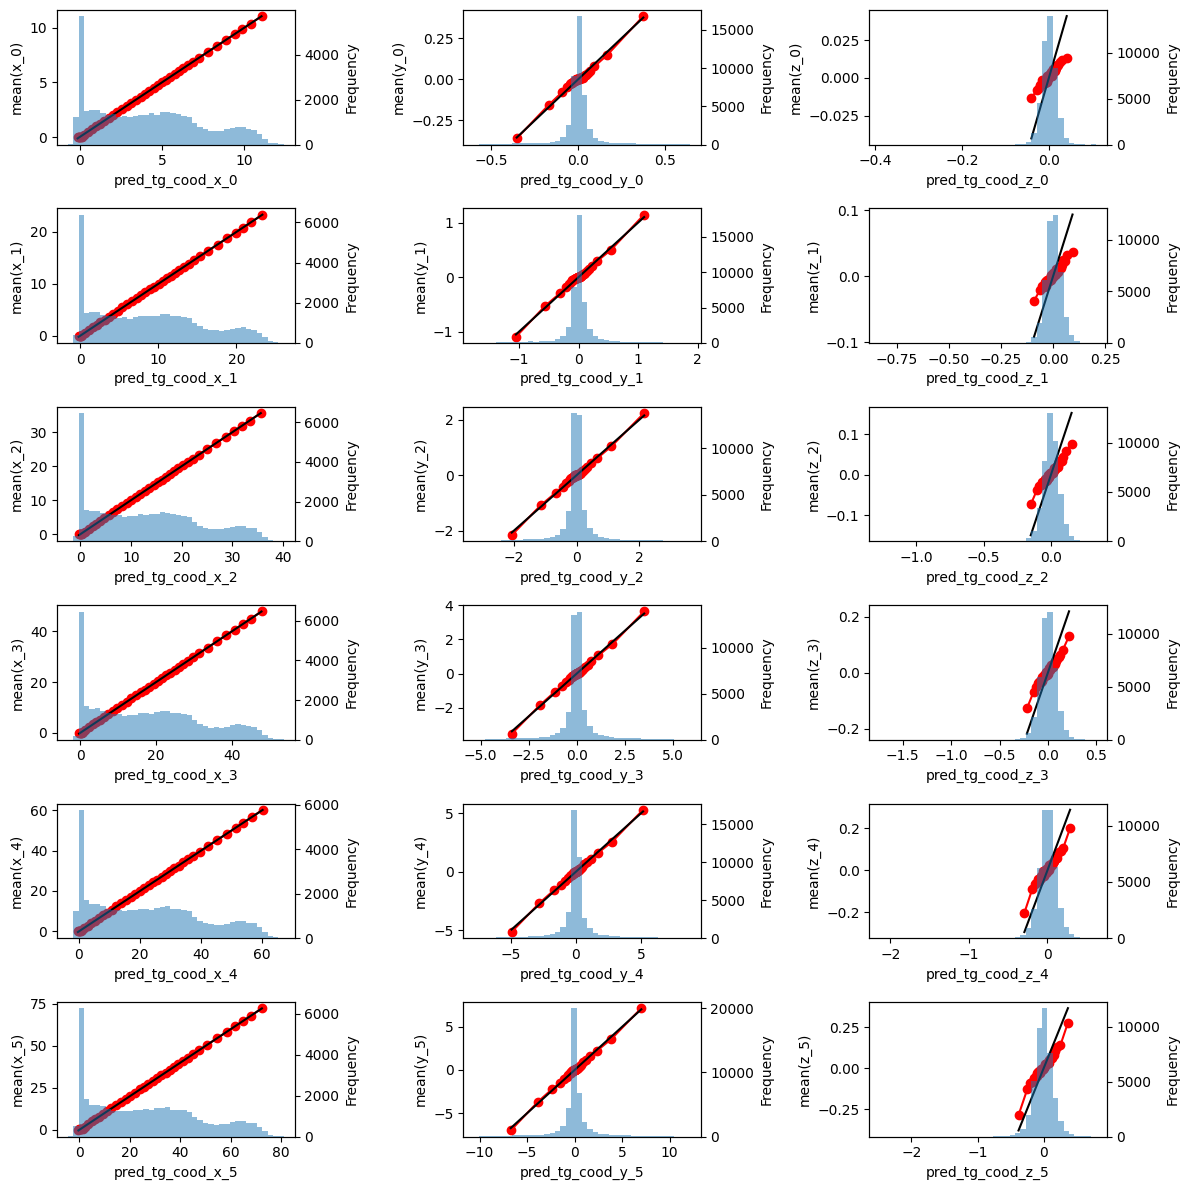

In [16]:
utils.plot_calibration_curve(tr_df, pred_cols, n_bins=40)

## Submission

In [17]:
preds = utils.predict(models, ts_images, ts_df, feature.columns, pred_cols)
preds

pred_tg_cood_x_0,pred_tg_cood_y_0,pred_tg_cood_z_0,pred_tg_cood_x_1,pred_tg_cood_y_1,pred_tg_cood_z_1,pred_tg_cood_x_2,pred_tg_cood_y_2,pred_tg_cood_z_2,pred_tg_cood_x_3,pred_tg_cood_y_3,pred_tg_cood_z_3,pred_tg_cood_x_4,pred_tg_cood_y_4,pred_tg_cood_z_4,pred_tg_cood_x_5,pred_tg_cood_y_5,pred_tg_cood_z_5
f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32,f32
1.456119,-0.037171,-0.000343,2.981098,-0.051073,0.005169,4.563787,-0.045213,-0.001794,6.126938,-0.034824,-0.004316,7.48008,-0.005332,0.005053,9.039952,0.032898,-0.002004
0.898282,0.357201,0.002918,1.825349,0.946156,0.016095,2.517737,1.724587,0.01649,3.133799,2.672482,0.02857,3.834919,3.697461,0.030126,4.287844,4.842062,0.033149
1.623713,-0.003601,-0.008286,3.313119,0.003643,-0.016023,4.788222,0.003716,-0.030115,6.263453,-0.053533,-0.046333,7.670166,-0.089068,-0.052818,8.72244,-0.152687,-0.071854
0.920439,0.048075,-0.014455,1.719912,0.177665,-0.032904,2.584871,0.394679,-0.05634,3.281188,0.76382,-0.071743,4.106535,1.332962,-0.113134,4.732486,2.048873,-0.142398
0.800945,0.012549,-0.023295,1.41749,0.024886,-0.048753,1.779672,0.038636,-0.079305,2.084111,0.070706,-0.099629,2.013025,0.054551,-0.118731,2.162749,0.098376,-0.137229
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
6.524271,0.021673,0.004455,13.721273,0.110085,0.007029,20.913284,0.284179,0.004445,28.099606,0.517048,-0.009157,35.354069,0.81829,-0.025276,42.711914,1.20916,-0.053492
7.009111,-0.003271,-0.00574,14.883411,-0.016754,-0.025218,22.81925,-0.042615,-0.073476,30.750998,-0.090616,-0.132791,38.92765,-0.1502,-0.217131,46.933403,-0.189575,-0.313156
7.416322,-0.01733,-0.001819,15.657611,-0.06167,-0.003669,23.814711,-0.106117,0.008269,32.013947,-0.144733,0.026405,40.049942,-0.197198,0.059227,48.117447,-0.254411,0.091734


In [18]:
def create_submission_csv(preds: pl.DataFrame, filename: str = "submission.csv"):
    submission_cols = sum([[f"x_{i}", f"y_{i}", f"z_{i}"] for i in range(6)], [])

    # validate preds columns
    if len(preds.columns) != len(submission_cols):
        raise ValueError(
            f"preds columns must be {len(submission_cols)}, but got {len(preds.columns)}"
        )

    preds.columns = submission_cols
    preds.write_csv(filename)
    print(f"Submission file is created: {filename}")


create_submission_csv(preds)

Submission file is created: submission.csv
